# Project description
- You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

# Step 1. 
- Open the data file and study the general information

In [1]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
#Load our date and checking, with what we will work further 
project_info = pd.read_csv('vehicles_us.csv')
project_info.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
27056,15500,2011.0,ford f-150,excellent,8.0,gas,156000.0,automatic,truck,white,1.0,2018-09-27,6
5992,11000,1990.0,chevrolet silverado,good,8.0,gas,90000.0,automatic,pickup,black,NaN,2018-10-16,47
40280,8900,2012.0,nissan murano,excellent,6.0,gas,110000.0,automatic,SUV,black,1.0,2018-12-09,21
48113,14991,2016.0,hyundai sonata,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-09-10,92
10051,44300,2018.0,chevrolet silverado 1500,good,8.0,gas,10500.0,automatic,pickup,black,1.0,2018-06-26,28


In [3]:
# Let's find general information from our data
project_info.info()
project_info.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(51525, 13)

# Step 2. Data preprocessing
- Identify and study missing values:

In [4]:
#Function which will show us in what column and how many missing values we have
project_info.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

- From now we can clearly say that we have a lot of missing values and problems in our columns, let's work one by one with our columns to solve them, and define why we have such issues, maybe some of the missing values we can't just replace or change because it's can be critical to our final result

> "Odometer"
- I propose to start work with the "odometer" column and find out what kind of missed values we have and to what category they belong, we will divide our odometer column by condition category to each type we will find the median and after will fill missing values by their category. But for this, we need to drop all missing values and go further

In [5]:
#First, we will create a new table that will contain two of our working columns
odometer = project_info[['condition','odometer']]
odometer.sample(10)

,condition,odometer
48740,like new,65649.0
40355,excellent,67592.0
7783,excellent,119020.0
31764,like new,85000.0
42694,like new,37539.0
18898,excellent,218000.0
354,excellent,NaN
17054,good,NaN
43360,good,132000.0
2459,good,126000.0


In [6]:
#Droping all our missing values
new_odo = odometer.dropna()
new_odo.isnull().sum()

condition    0
odometer     0
dtype: int64

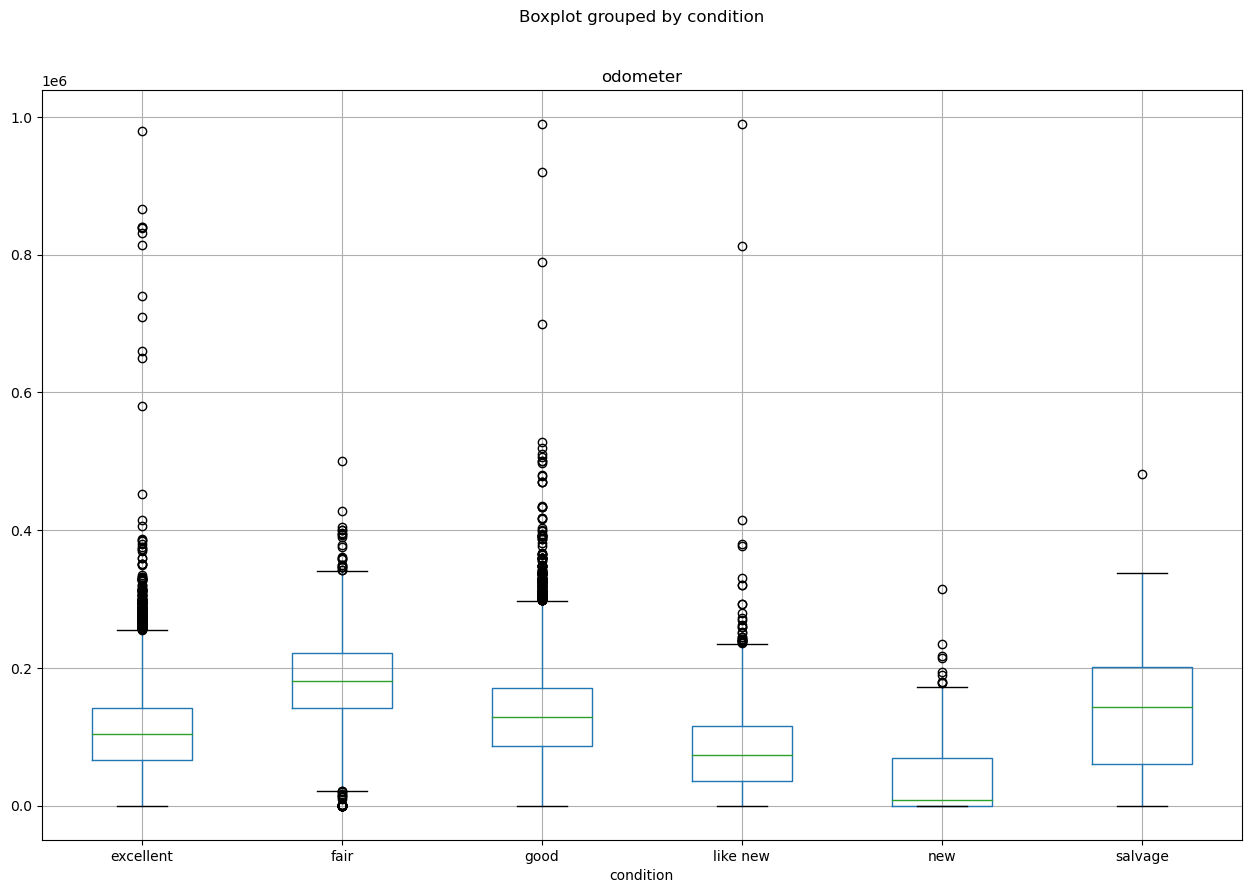

In [7]:
#I propose to create a box plot to find out what kind of outliers and how many of them we have to make our life a little easier
new_odo.boxplot(column='odometer',by='condition',figsize=(15,10));

-Now we can say that most of our cars have mileage between 0 to 250000 but we have a few outliers let's find out how many of them and if their number will be less or equal then 2% just will drop them and move on

In [8]:
#Number of cars with mileage bigger then 250000
len(new_odo.query('odometer > 250000'))

1047

In [9]:
#I propose to find how many of our cars how mileage of more than 250000
('The number of outliers with mileage of more than 250000 compared to our data equal to {:.0%}'.format(len(new_odo.query('odometer > 250000')) / len(new_odo)))

'The number of outliers with mileage of more than 250000 compared to our data equal to 2%'

- This is nothing compared to our data we can simply drop them because this data only need to find the median and after that, we will refill our column and go to the next step

In [10]:
#Let's recreate our new table by dropping all odometer values bigger then250000
new_odo = new_odo.query('odometer <= 250000')

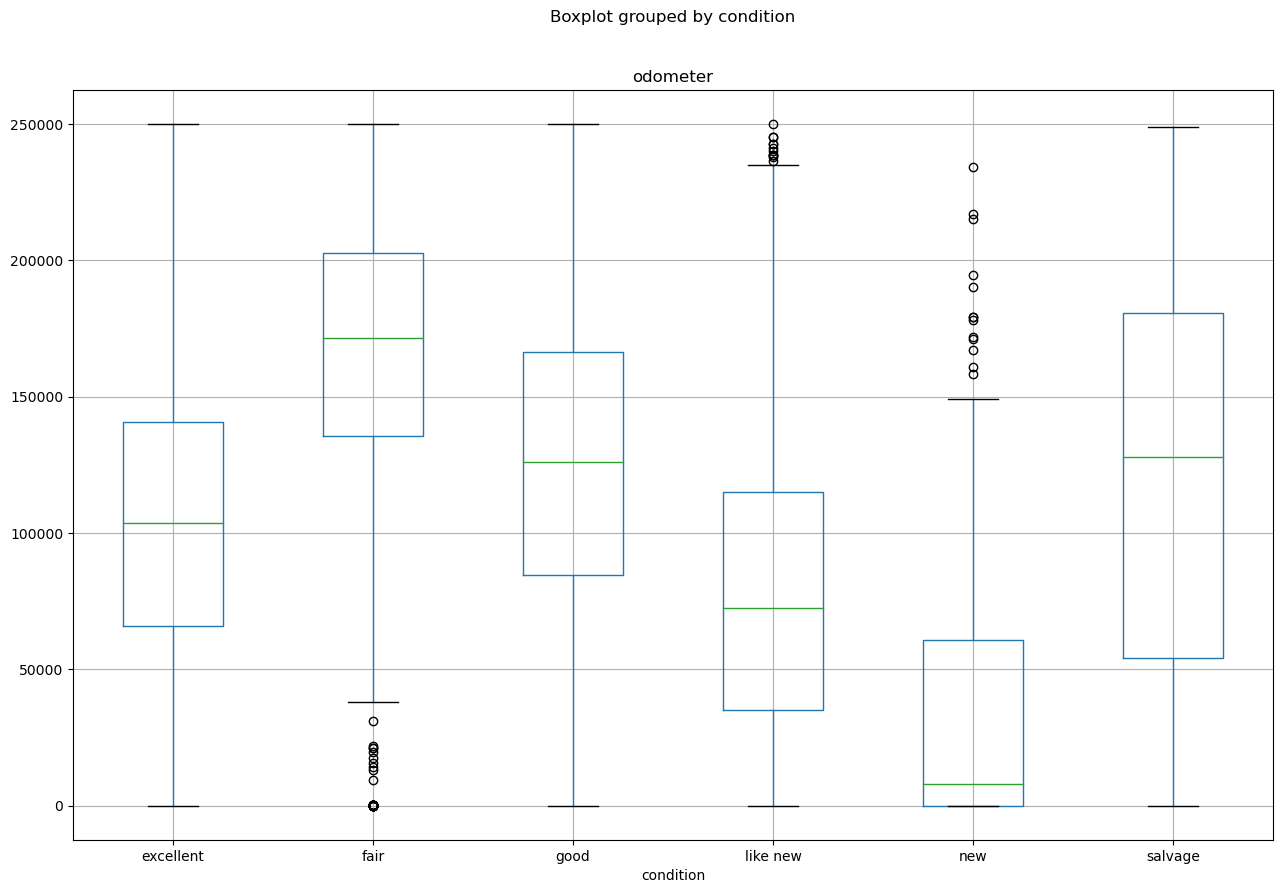

In [11]:
#Now we can create again box plot like we did previously, but with new data 
new_odo.boxplot(column='odometer',by='condition',figsize=(15,10));

> Now we can read our table in much more easier way and analyze what kind of mistakes each category has. In my opinion lets reassignment our category condition by following rules
- to the "new" category will belong to all cars with mileage == 0
- to the "like_new" category will belong to all cars with mileage <= 50000
- to the "excellent" category will belong each car with mileage <= 100000
- to the "good" category will belong each car with mileage <= 150000
- to the "fair" category will belong each car with mileage <= 250000
- to the "salvage category will belong each car with mileage > 250000

> But before we will assign, let's fill all missing values by median grouping by each type of condition

In [12]:
#Function for refilling all missing values by their "median"
project_info['odometer'].fillna(project_info.groupby(['condition'])['odometer'].transform('median'),inplace=True)   
project_info

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [13]:
#Checking if all worked in the right direction
project_info.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [14]:
#Let's take the main information from our column to see if all worked well
project_info['odometer'].describe()

count     51525.000000
mean     115199.014508
std       60484.863376
min           0.000000
25%       75668.000000
50%      110908.000000
75%      147821.000000
max      990000.000000
Name: odometer, dtype: float64

> Now when we refilled our all missing values in the "odometer" column let's work with our condition table and find out what kind of problem we have there, and group all our conditions parameters by their values 
- We will use the function which will help us to clear our mess and refill our condition by odometer to find out which of the car belong to each category 

In [15]:
#Creating a function that will categorize our car by their mileage
def right_cond(row):
    od= row['odometer']
    if  od == 0:
        return 'new'
    elif od <= 50000:
        return 'like new'
    elif od <= 100000:
        return 'excellent'
    elif od <= 150000:
        return 'good'
    elif od <= 250000:
        return 'fair'
    return 'salvage'

In [16]:
#Applying a function to the "condition" column
project_info['condition'] = project_info.apply(right_cond, axis=1)

- When we cleared our mess let's find out to what category belongs most of our cars. We will use a pie chart to add some visualization. 

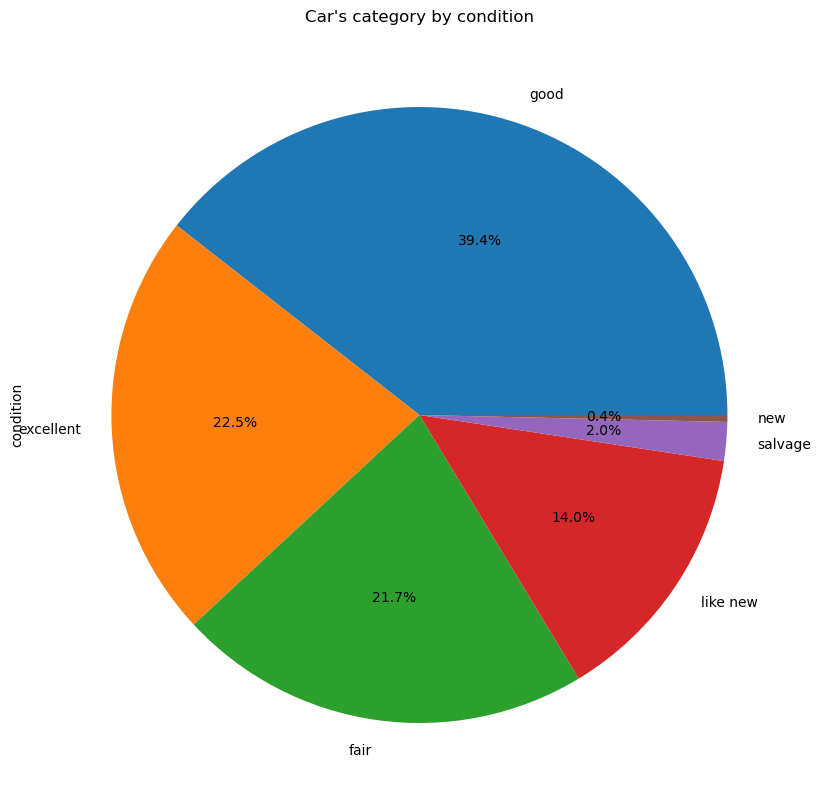

In [17]:
project_info['condition'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10,10), title= "Car's category by condition");

# Conclusion:
- After analyzing what kind of missing values we have in our column and replacing them with median parameters, and after that  we regrouped our condition columns by odometers parameter we can clearly say:
that the most amount of our cars belongs to a "good" condition.

>Let's start working with the "model year" column and prepare this column to work further

In [18]:
#First, we will check how many missing values we have in our column
project_info['model_year'].isnull().sum().sum()

3619

- A bit a lot. In my opinion, the best solution is to group our car by condition, find the median age for each condition, and refill our missing values by them
- First let's drop all missing values and find the main parameters from our column which will help us move on 

In [19]:
model_years = project_info[['condition','model_year']].dropna()

In [20]:
model_years.isnull().sum().sum()

0

In [21]:
#Finding main parameters from our "model_year" column
project_info.pivot_table(index='condition', values='model_year',aggfunc=['median','mean','min','max'])

,median,mean,min,max
,model_year,model_year,model_year,model_year
condition,,,,
excellent,2013.0,2011.734088,1958.0,2019.0
fair,2006.0,2006.010098,1908.0,2019.0
good,2010.0,2009.349610,1908.0,2019.0
like new,2016.0,2014.535215,1936.0,2019.0
new,2009.0,2006.482558,1962.0,2018.0
salvage,2003.0,2002.960703,1964.0,2018.0


- Seems we have a  bit of a mess in our column let's create a box plot to find out how many outliers we have in our model_years group by condition
- But from this table, we can see that year of the newest cars is equal to "2019"

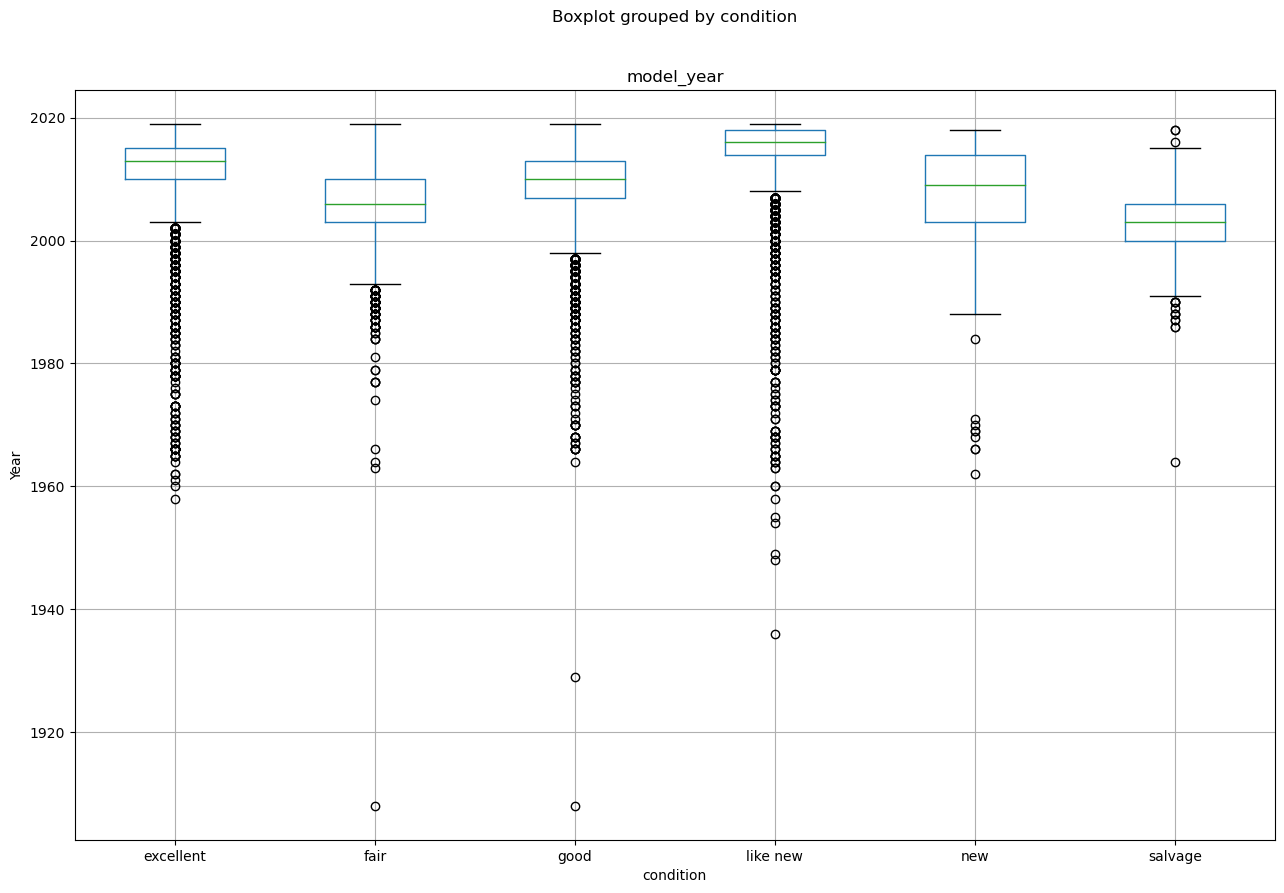

In [22]:
model_years.boxplot(column='model_year',by='condition',figsize=(15,10));
plt.ylabel('Year');

- Result: from our boxplot, we can say that most of our cars belong to the year's category above 2000
- In my opinion, what I see from this boxplot that's we have a bit of an outlier in each condition, let's work with them and make our table more workable. For this task, we will use "Quartiles"

In [23]:
#let's create a function wich will take 2 parameters, first data and second name of the columns
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)#The value located at the 25th percentile of our data in "model_year" column
    q3 = df_in[col_name].quantile(0.75)#The value located at the 75th percentile of our data in "model_year" column
    iqr = q3-q1 #Interquartile range- represents the spread of the middle 50% of the data
    fence_low  = q1-1.5*iqr# Min values range
    fence_high = q3+1.5*iqr# Max values range
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [24]:
col_name = 'model_year'
model_years = remove_outlier(model_years,col_name)

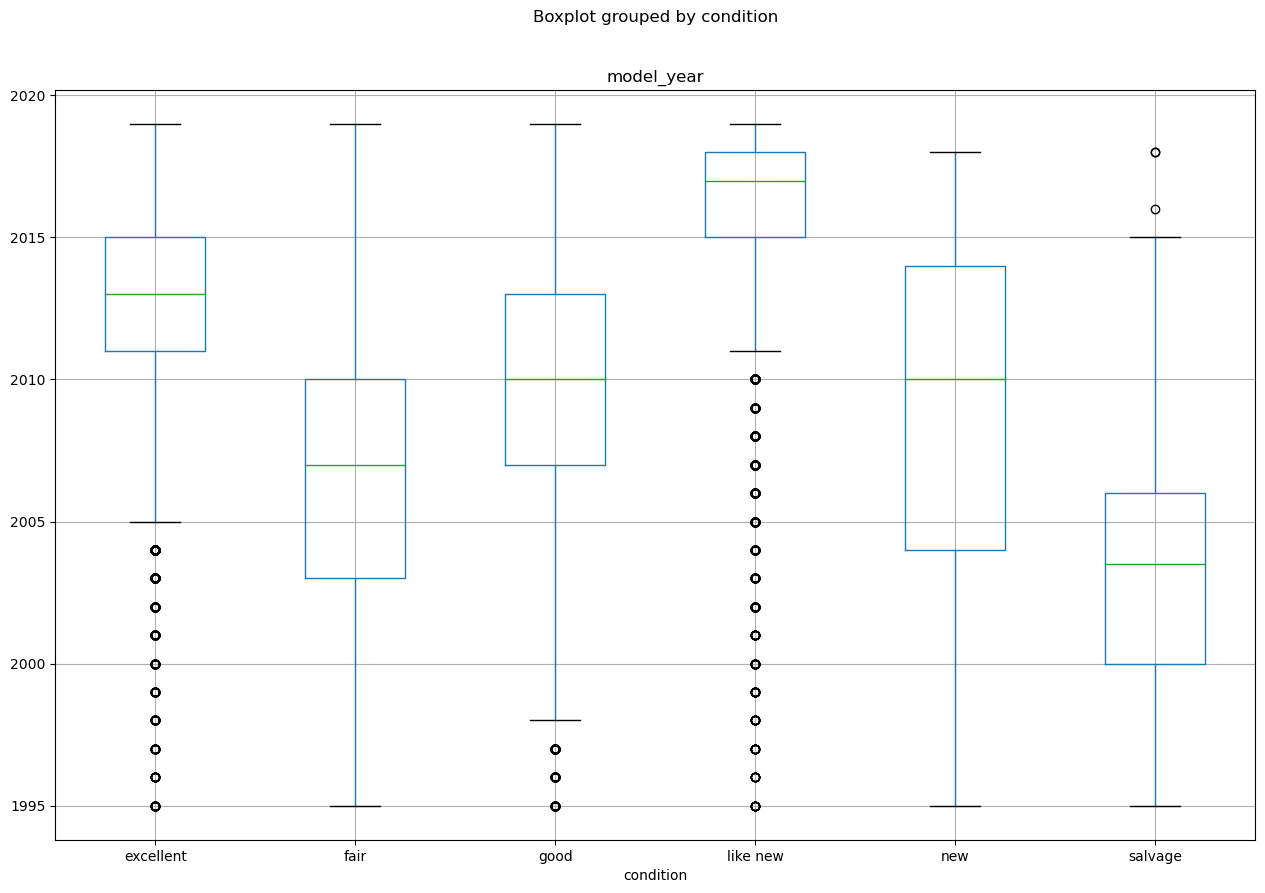

In [25]:
#Now let's create again boxplot and find out if all working properly
model_years.boxplot(column='model_year',by='condition',figsize=(15,10));

- Now our boxplot seems more understandable and we can start working with our model_years table and find the median for each category and replace our missing values with them

In [26]:
#First, let's create a pivot table and find our main parameters
median_years_upd = project_info.pivot_table(index='condition', values='model_year',aggfunc=['median','mean','min','max'])
median_years_upd

,median,mean,min,max
,model_year,model_year,model_year,model_year
condition,,,,
excellent,2013.0,2011.734088,1958.0,2019.0
fair,2006.0,2006.010098,1908.0,2019.0
good,2010.0,2009.349610,1908.0,2019.0
like new,2016.0,2014.535215,1936.0,2019.0
new,2009.0,2006.482558,1962.0,2018.0
salvage,2003.0,2002.960703,1964.0,2018.0


In [27]:
#We will fill all missing values with median model year grouping by each type of condition
project_info['model_year'].fillna(project_info.groupby(['condition'])['model_year'].transform('median'),inplace=True) 

In [28]:
#Checking if all working in the right conditions
project_info.sample(30)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
6664,22999,2014.0,ford mustang,excellent,8.0,gas,54828.0,manual,other,NaN,NaN,2018-08-11,122
21098,7988,2012.0,nissan rogue,good,4.0,gas,103020.0,automatic,SUV,NaN,1.0,2019-03-09,74
19988,6450,2010.0,chrysler town & country,good,6.0,gas,135000.0,automatic,mini-van,green,NaN,2018-12-15,22
33387,4195,2010.0,nissan sentra,good,4.0,gas,130000.0,automatic,sedan,NaN,NaN,2019-02-23,20
42235,15495,2007.0,ram 2500,fair,6.0,diesel,171884.0,automatic,pickup,blue,1.0,2018-12-18,31
5314,1000,2010.0,subaru outback,good,6.0,gas,129000.0,automatic,sedan,NaN,1.0,2018-08-28,40
49295,9990,2014.0,toyota corolla,excellent,4.0,gas,92937.0,automatic,sedan,black,NaN,2018-06-16,5
50125,995,1999.0,jeep cherokee,good,6.0,gas,134000.0,automatic,SUV,white,1.0,2019-03-30,13
38350,26900,2017.0,ford f250 super duty,good,8.0,gas,109366.0,automatic,truck,red,1.0,2018-10-11,18
34914,4495,2009.0,nissan altima,good,4.0,gas,129000.0,automatic,sedan,NaN,NaN,2018-09-14,6


- Now that we solved our mess in the model_year column let's create our bar chart and show the dependency between age and conditions of the car in our data

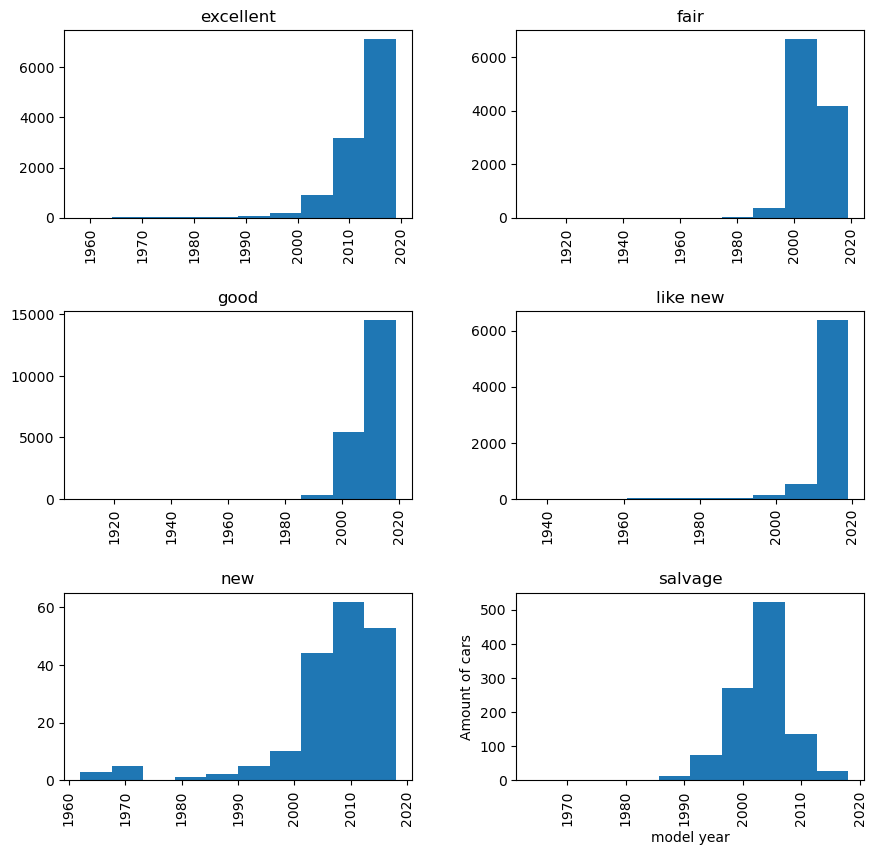

In [29]:
project_info.hist(column='model_year',by='condition',grid=True,figsize=(10,10));
#For a better understanding of what axis values we have let's add to one hist x,y labels
plt.ylabel('Amount of cars')
plt.xlabel('model year');

# Conclusion:
- From our histo we can say that each category of cars has a big range of cars by their years, but most of them belong as we said previously from 2000 to 2019

>Now we can move on and start working with the "cylinders" column

In [30]:
project_info.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders        5260
fuel                0
odometer            0
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [31]:
# First we will check what kind of types of cylinders we have 
project_info['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

- I propose to go in the same way as we did before, drop all nan values, find the median of types of cylinders, and refill our missing values

In [32]:
# Let's create a new variable, and dropping all missing values
cylinders = project_info[['cylinders','condition']].dropna()

In [33]:
# Check if all our missing values are droped
cylinders.isnull().sum()

cylinders    0
condition    0
dtype: int64

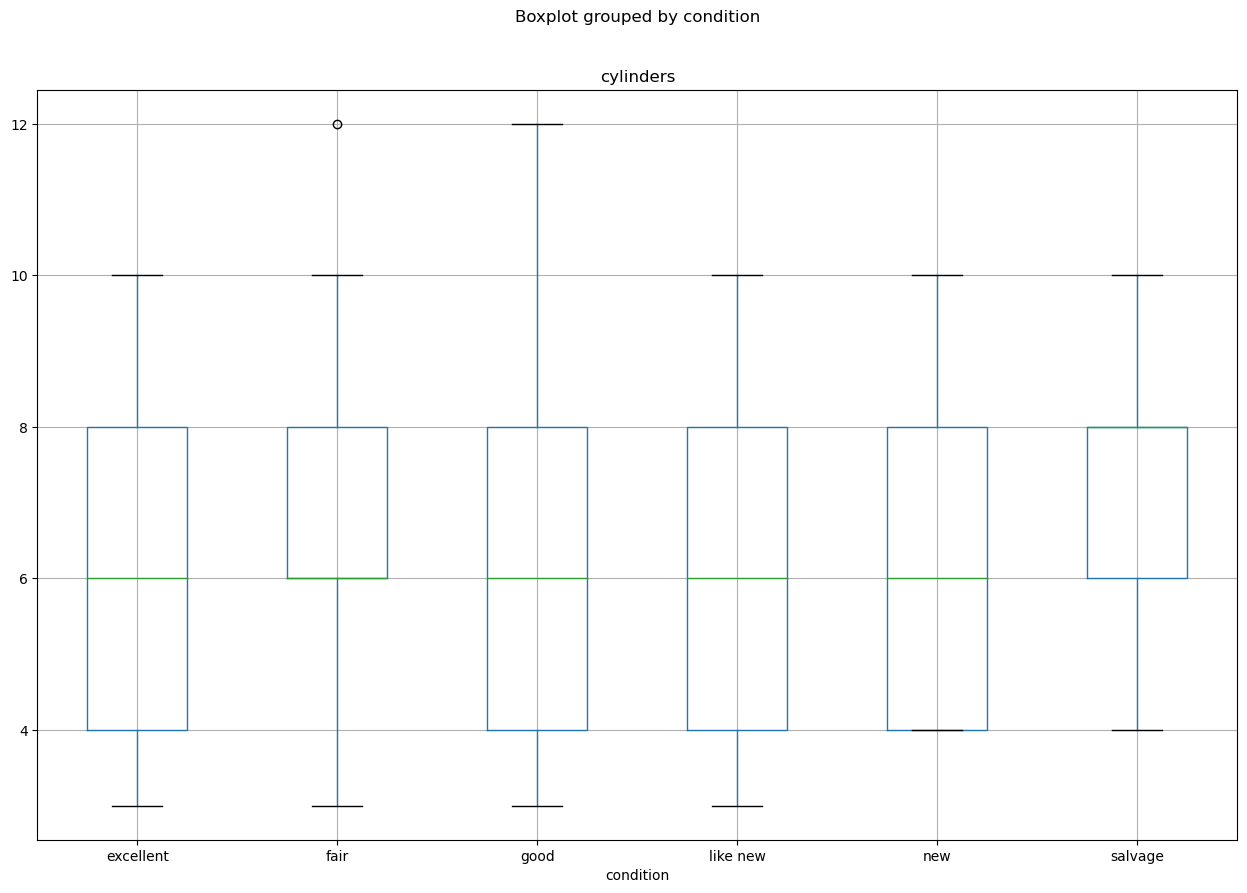

In [34]:
#well let's create a box plot to check how many outliers we have
cylinders.boxplot(column='cylinders',by='condition',figsize=(15,10));

- Seems nice, now when we made sure that we don't have outliers let's sort our cylinders and find out to what types of conditions belong each type of cylinders

In [35]:
#creating a pivot table to find the median and mean parameters
cylinders.pivot_table(index='condition', values='cylinders',aggfunc=['median','mean'])

,median,mean
,cylinders,cylinders
condition,,
excellent,6.0,5.940172
fair,6.0,6.374851
good,6.0,6.067376
like new,6.0,6.117240
new,6.0,5.855422
salvage,8.0,6.725134


- From our table  we can see that most of our cars have 6.0 cylinders, I propose to refill our missing values in the column by those value 

In [36]:
#function to fill all missing values by median 
project_info['cylinders'] = project_info['cylinders'].fillna(6.0)

In [37]:
#checking if all working correctly
project_info['cylinders'].isnull().sum()

0

- Let's create a bar chart to add some vizualization

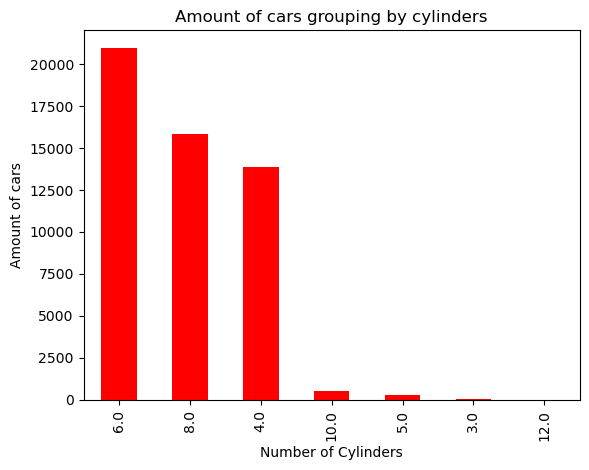

In [38]:
project_info['cylinders'].value_counts().plot.bar(color='red');
plt.xlabel("Number of Cylinders")
plt.ylabel("Amount of cars")
plt.title("Amount of cars grouping by cylinders");

# Conclusion:
- After we refill our missing values, from our bar chart we can clearly say that most of our cars have 6.0 cylinder

> Let's move on to the  "Paint color" column
- I propose to fill our missing values in paint color with "other" types of color and, check what unique types we have here, and to what type of color belong most of our cars

In [39]:
project_info['paint_color'] = project_info['paint_color'].fillna('Other')
project_info['paint_color'].isnull().sum()

0

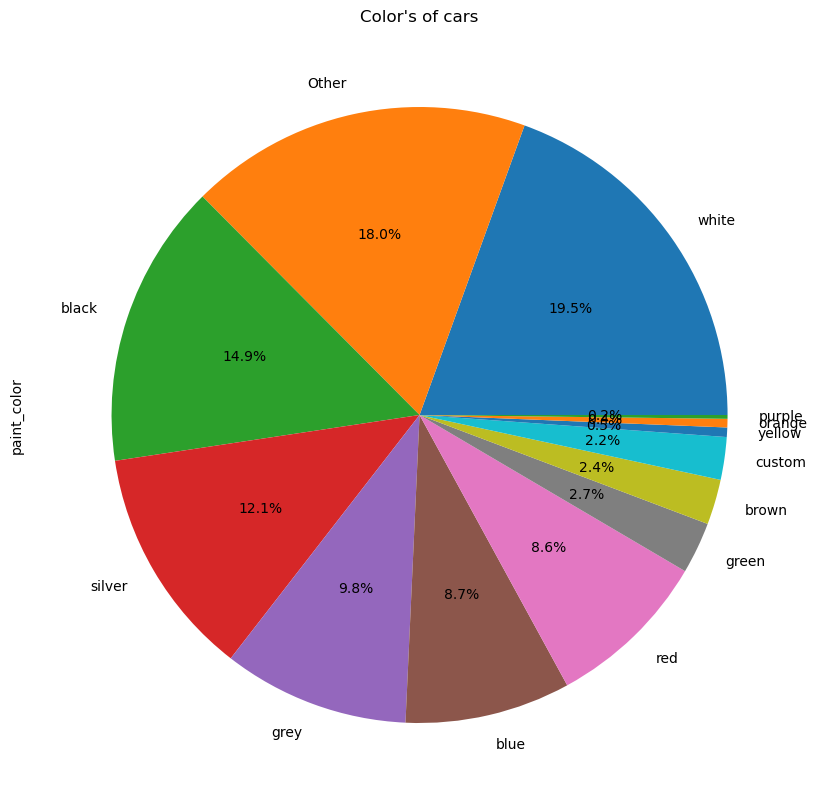

In [40]:
#Add some visualization to find which type of color has the biggest amount of cars
project_info['paint_color'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10,10), title= "Color's of cars");

# Conclusion:
- From our pie plot, we can see that the most common color is "White" and the rare is "purple"

>Now when we come near to finishing our data processing, we can work with our last column which has missing values "is_4wd "

In [41]:
project_info.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color         0
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [42]:
#Finding what types of values we have 
project_info['is_4wd'].unique()

array([ 1., nan])

- From the last step I want to propose that all our missing values are for cars which don't have 4x4 let's refill our missing value by "0" which will mean no 4x4 drive type

In [43]:
project_info['is_4wd'] = project_info['is_4wd'].fillna(0)
project_info['is_4wd'].unique()

array([1., 0.])

In [44]:
#Checking how many cars we have by categories of gear
project_info['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

# Conclusion:
- By this column, we can say that we have near half on half cars by each gear type

> Now when we finish all work with our missing values let's move on and work with another column and check if there we have any mess
- Let's start by checking what kind of price we have by our car conditions and what problem we can see in this column

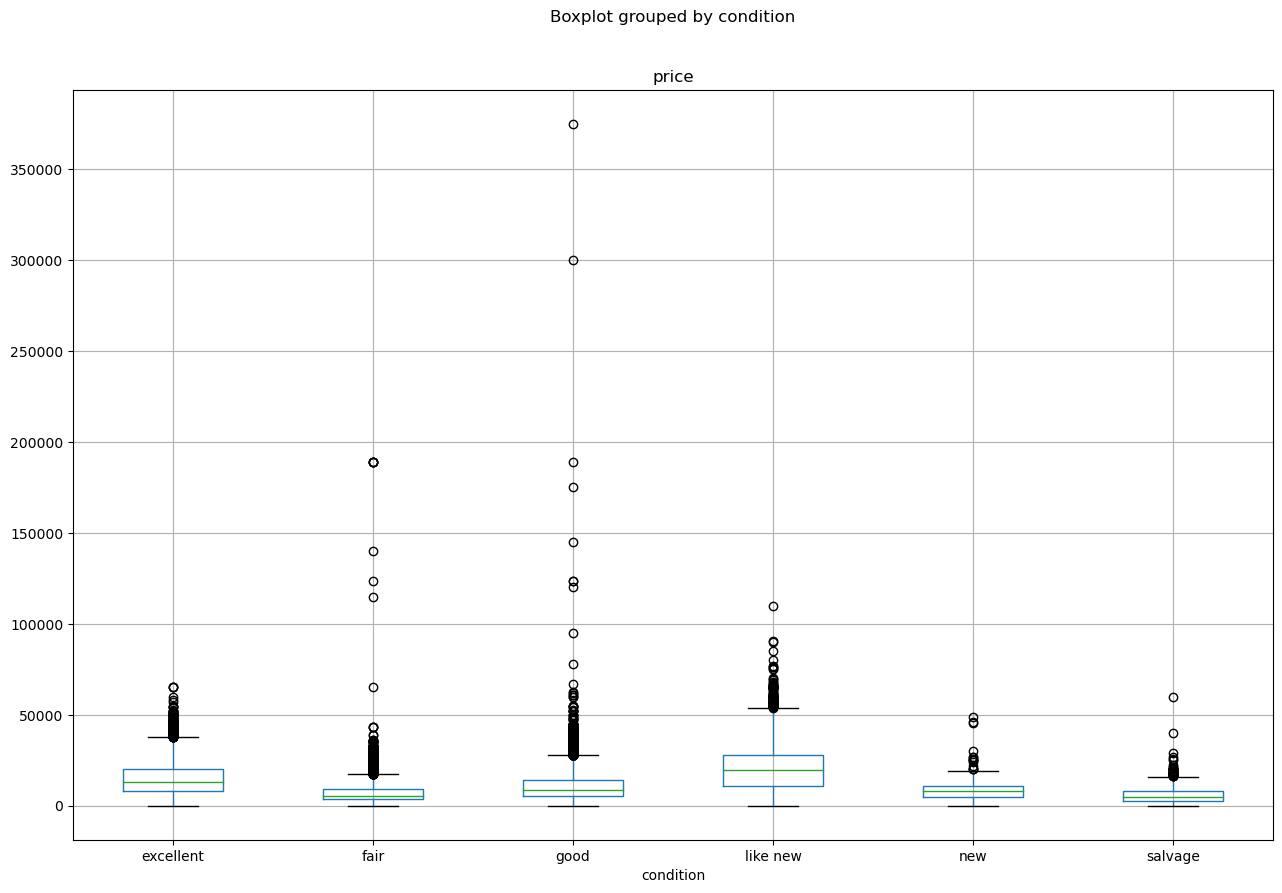

In [45]:
#first, we will create a boxplot to understand what kind of  outliers we have
project_info.boxplot(column='price',by='condition',figsize=(15,10));

- Seems we have a lot of work to do, especially when we see that we have a cars whose price is equal to 0
- But first, we will drop all outliers as we did previously, and after will continue working with column

In [46]:
#Creating a new table
pro_price = project_info[['condition', 'price']]
pro_price.sample(5)

,condition,price
46457,fair,6450
51280,fair,5573
5417,excellent,18995
25359,good,18000
40250,excellent,46295


In [47]:
#We will call our function again and drop all outliers because further we need to find the median price by each type of car condition
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [48]:
# Removing outliers from the "price" column 
col_names = 'price'
pro_price = remove_outlier(pro_price,col_names)

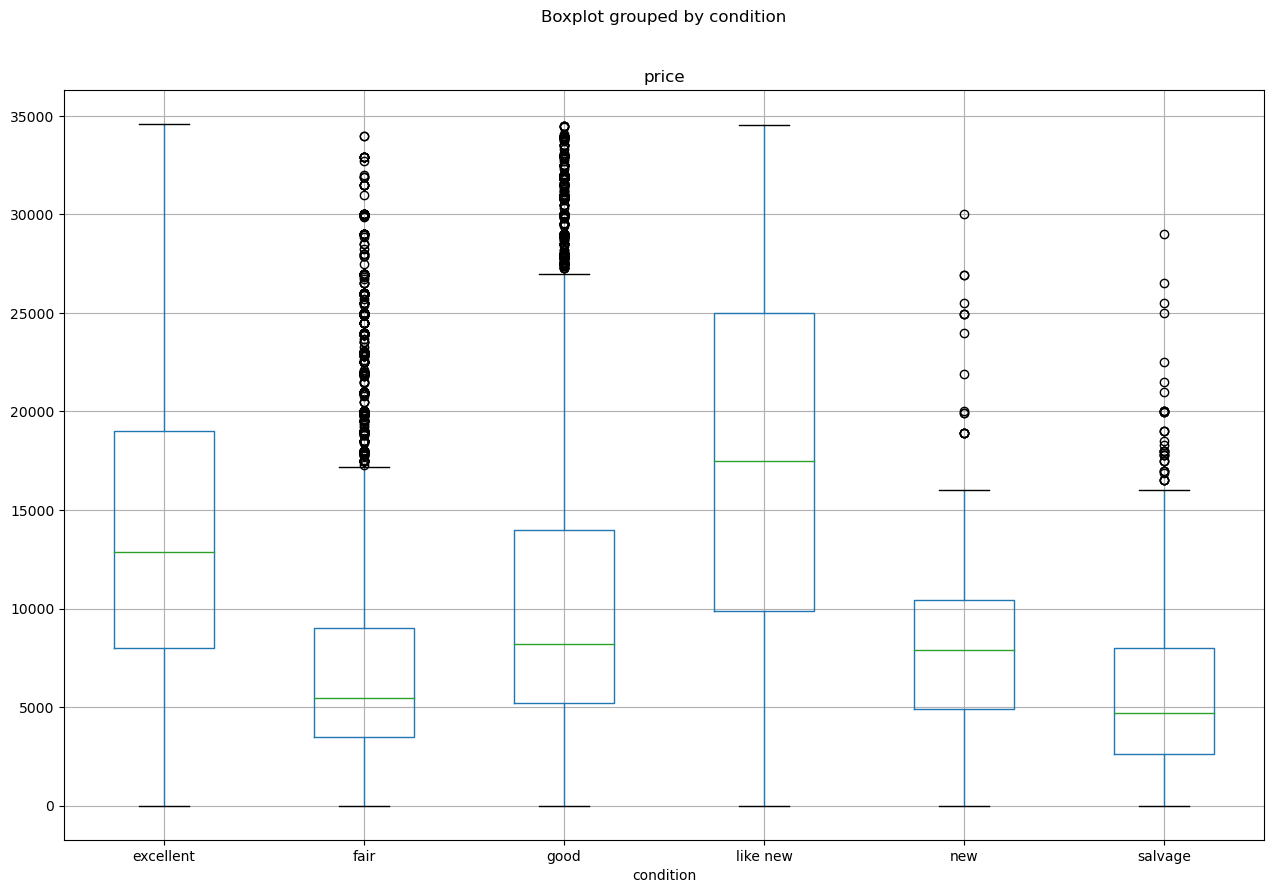

In [49]:
#let's check if all work correctly by recreating the boxplot and watching what we have
pro_price.boxplot(column='price',by='condition',figsize=(15,10));

- From this boxplot we can clearly see a real situation in our column, we can see that each of our categories has cars with a price equal to 0 and most of our cars belong to the range between 2500 and 30000 let's find out how many cars we have with price less than 2500 and bigger 30000 

In [50]:
# Amount of cars with price less then 2500 and more then 30000
pro_price.loc[(pro_price['price']<2500) | (pro_price['price']>30000)].value_counts().sum()

4470

- More than 4400 cars are a big piece of our data we can't simply drop them. I propose to find the median price for each type of condition and then refill our problematic values with that median

In [51]:
# Drop all problems values which can lead us into misunderstandings
pro_up_price= pro_price.loc[pro_price['price'] < 30000]
pro_up_price = pro_up_price.loc[pro_up_price['price'] >2500]

In [52]:
#Checking if all mess was dropped
pro_up_price.describe()

,price
count,44881.000000
mean,11487.045364
std,6996.289235
min,2550.000000
25%,5900.000000
50%,9500.000000
75%,15990.000000
max,29999.000000


In [53]:
#Creating pivot table to find mean,median salary for each type of conditions
median = pro_up_price.pivot_table(index='condition', values='price',aggfunc=['median','mean'])
median

,median,mean
,price,price
condition,,
excellent,12950,13949.336575
fair,5995,7810.361550
good,8700,10528.547095
like new,17991,17627.960730
new,7997,9314.993902
salvage,5979,7324.062341


In [54]:
#Solving problem with multiply index
median.columns = ['_'.join(col).strip() for col in median.columns.values]
median

,median_price,mean_price
condition,,
excellent,12950,13949.336575
fair,5995,7810.361550
good,8700,10528.547095
like new,17991,17627.960730
new,7997,9314.993902
salvage,5979,7324.062341


- Now we can fill our problematic values from each type of condition by our median. I propose to find all cars with prices less than 2500 and refill them by a median of types conditions
- For those we will use the function that we created in the previous line code

In [55]:
#Let's create a boolean values
med_price_ex = median['median_price'][0]
med_price_fair = median['median_price'][1]
med_price_good = median['median_price'][2]
med_price_l_new = median['median_price'][3]
med_price_salv = median['median_price'][5]
med_price_new = median['median_price'][4]

In [56]:
def right_price(row):
    od = row['price']
    col = row['condition']
    if (od < 2500) and (col == "new"):
        return med_price_new
    elif (od < 2500) and (col == "like new"):
        return med_price_l_new
    elif (od < 2500) and (col == "fair"):
        return med_price_fair
    elif (od < 2500) and (col == "good"):
        return med_price_good
    elif (od < 2500) and (col == "excellent"):
        return med_price_ex
    elif (od < 2500) and (col == "salvage"):
        return med_price_salv
    return od

In [57]:
#applying our function to our data 
project_info['price'] = project_info.apply(right_price,axis=1)

In [58]:
#Taking main information 
project_info['price'].describe()

count     51525.000000
mean      12717.354313
std        9694.226894
min        2500.000000
25%        5995.000000
50%        9850.000000
75%       16998.000000
max      375000.000000
Name: price, dtype: float64

> After we finish with the price Let's move on and will check the "type column", "fuel", , to find out to what type belong most of our cars are and if we have any problem there

In [59]:
#Types of cars
project_info['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

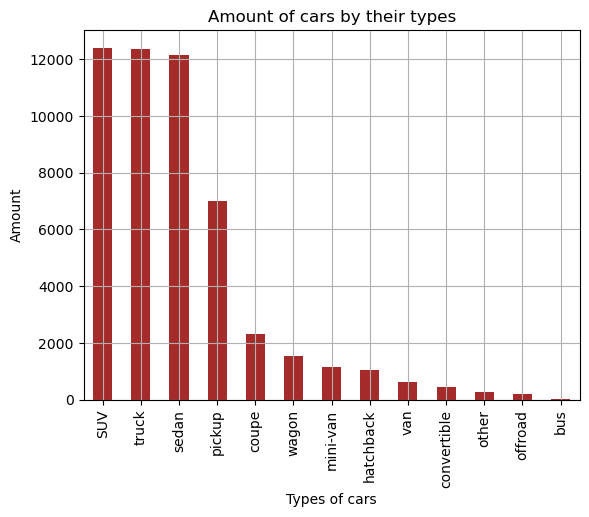

In [60]:
project_info['type'].value_counts().plot(kind='bar',grid=True,color='brown');
plt.title('Amount of cars by their types')
plt.xlabel('Types of cars')
plt.ylabel('Amount');

In [61]:
project_info['fuel'].unique()

array(['gas', 'diesel', 'other', 'hybrid', 'electric'], dtype=object)

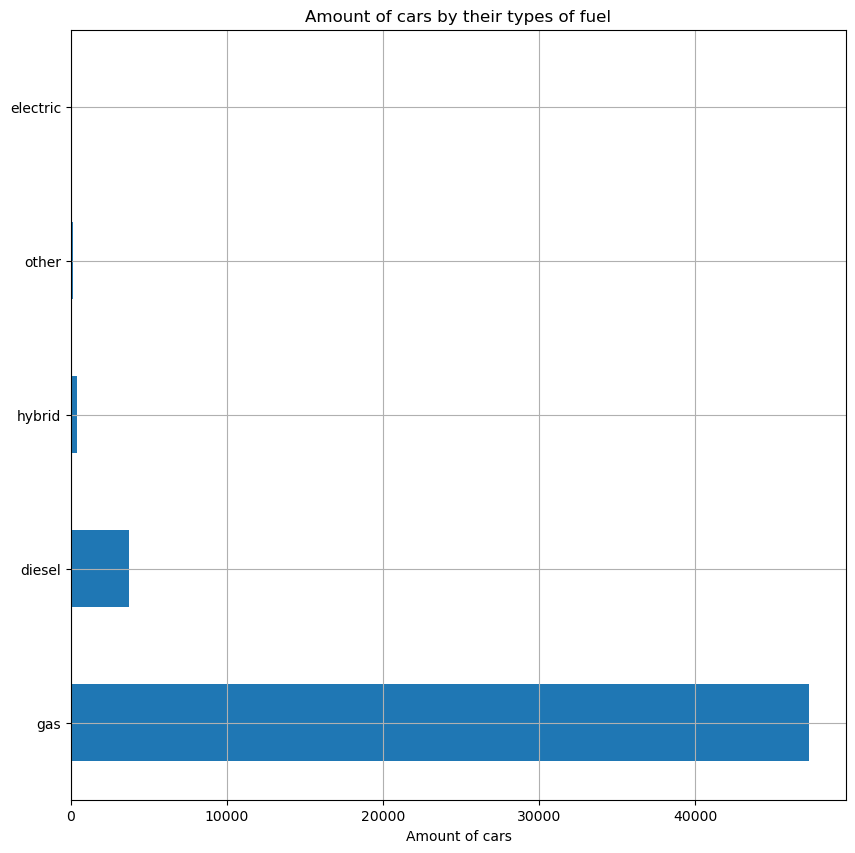

In [62]:
# let's find out what types of fuel belong to most or less amount of cars and will create a bit of visualization
project_info['fuel'].value_counts().plot.barh(grid=True,figsize=(10,10));
project_info['fuel'].value_counts()
plt.title('Amount of cars by their types of fuel')
plt.xlabel('Amount of cars');

# Conclusion
- From the previous two graphs we can say that we have most cars with gas-type of engines and SUV, truck, and sedan type of body
- Now when we finished our reprocessing we can begin analyzing  and solving the main tasks that we have in our project

In [63]:
#First let's check what type of column we have and will try to change their type to minimize memory 
project_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


- Our data is  use 5.1+ MB memory let's refill it with another type () of data and find out how many memory we will free

In [64]:
columns = ['price','model_year','cylinders','odometer','is_4wd','days_listed']

def convert_to(data,columns):
    for col in columns:
        data[col] = data[col].astype('int32')
    return data
project_info = convert_to(project_info,columns)

In [65]:
columns = ['model','condition', 'fuel', 'transmission','type','paint_color','date_posted']

def convert_to(data,columns):
    for col in columns:
        data[col] = data[col].astype('string')
    return data
project_info = convert_to(project_info,columns)

In [66]:
project_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int32 
 1   model_year    51525 non-null  int32 
 2   model         51525 non-null  string
 3   condition     51525 non-null  string
 4   cylinders     51525 non-null  int32 
 5   fuel          51525 non-null  string
 6   odometer      51525 non-null  int32 
 7   transmission  51525 non-null  string
 8   type          51525 non-null  string
 9   paint_color   51525 non-null  string
 10  is_4wd        51525 non-null  int32 
 11  date_posted   51525 non-null  string
 12  days_listed   51525 non-null  int32 
dtypes: int32(6), string(7)
memory usage: 3.9 MB


- Now memory decreased from 5.1+MB to 3.9MB and data type of columns changed. 

# Step 3. Calculate and add to the table the following:
- Day of the week, month, and year the ad was placed
- The vehicle's age (in years) when the ad was placed
- The vehicle's average mileage per year

- In the condition column we will replace string values with a numeric scale:
new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0
Step 4. Carry out 

> Let's add new columns to our table which will represent the day of the week, month, and year. Here we will work with the date posted column to divide her by day, month, and year. But in the first step, we will convert the type of column to datetime.

In [67]:
#Converting our column to datetime type. 
project_info['date_posted'] = pd.to_datetime(project_info['date_posted'], format='%Y-%m-%d %H:%M')
project_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int32         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  string        
 3   condition     51525 non-null  string        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  string        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  string        
 8   type          51525 non-null  string        
 9   paint_color   51525 non-null  string        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int32         
dtypes: datetime64[ns](1), int32(6), string(6)
memory usage: 3.9 MB


- Now we can start working and take outside all our values for a new column which we need 

In [68]:
#Using function assign to create a new column with our data by dt."" methods
project_info = project_info.assign(weekday = lambda x: x['date_posted'].dt.weekday,# Finding the week days by our "date_posted" column
                         month = lambda x: x['date_posted'].dt.month,# Finding the month by our "date_posted" column
                         year = lambda x: x['date_posted'].dt.year# Finding the week days by our "date_posted" column
                         )

In [69]:
project_info.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year
17061,21995,2017,ford edge,like new,6,gas,17876,automatic,SUV,grey,1,2018-06-20,6,2,6,2018
32240,29000,2019,honda cr-v,like new,4,gas,2400,automatic,SUV,red,0,2019-01-09,38,2,1,2019
23079,4900,2009,subaru forester,like new,4,gas,137,automatic,wagon,Other,1,2018-06-10,31,6,6,2018
1367,5995,2001,toyota camry,fair,4,gas,195894,automatic,sedan,custom,0,2018-11-12,24,0,11,2018
44614,4995,2002,gmc yukon,fair,8,gas,179520,automatic,SUV,Other,1,2018-07-09,78,0,7,2018


- Seems all working well. Let's make it easier to understand that in our "weekday" column we have "0" - Monday,  "6" -Sunday
> Now we can go to the next step and  calculate the vehicle's age (in years) when the ad was placed

In [70]:
#Creating a new column with the age of vehicles  with the help of the equation of the difference between two columns
project_info['Vehicle"s_age']= project_info['year'] - project_info['model_year']
project_info.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,"Vehicle""s_age"
42843,8500,2007,honda cr-v,good,4,gas,147000,automatic,SUV,silver,1,2018-07-29,32,6,7,2018,11
47391,25100,2015,chevrolet silverado 1500 crew,excellent,6,gas,58890,automatic,pickup,green,1,2018-08-23,72,3,8,2018,3
7681,12900,2012,gmc acadia,good,6,gas,112373,automatic,SUV,black,1,2019-01-24,51,3,1,2019,7
887,8495,2010,buick enclave,good,6,gas,131086,automatic,SUV,red,1,2018-08-09,25,3,8,2018,8
51158,24990,2016,ford f-150,excellent,6,gas,77851,automatic,truck,white,1,2018-06-24,40,6,6,2018,2


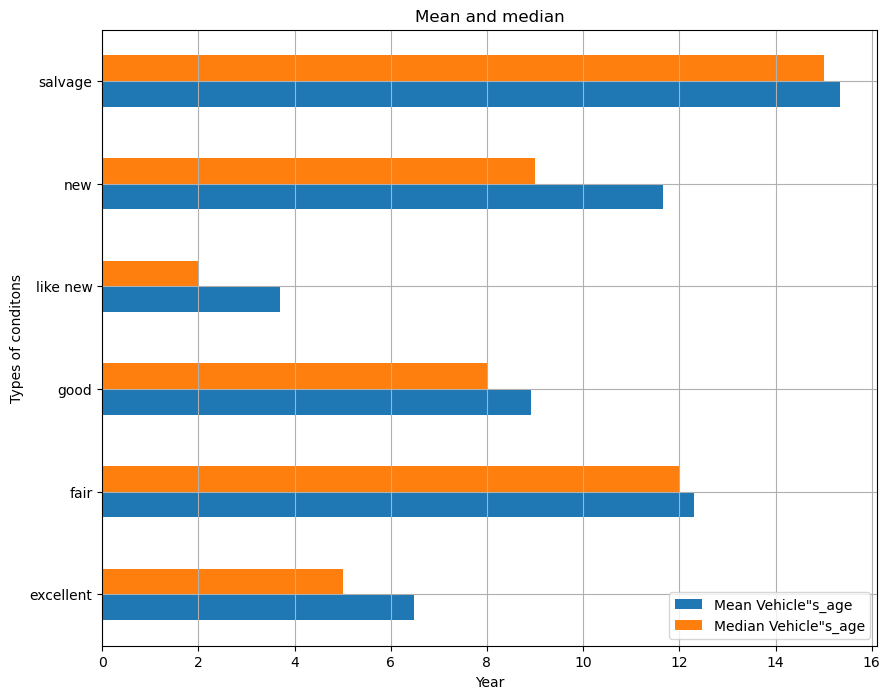

In [71]:
# Add some vizualization to find out what midle and meadn car age we have by each type of conditions
project_info.groupby(['condition']).agg(cond_year_mean=('Vehicle"s_age','mean'),
                           cond_year_median=('Vehicle"s_age','median')).plot.barh(figsize=(10,8),grid=True)
plt.title('Mean and median')
plt.legend(['Mean Vehicle"s_age','Median Vehicle"s_age'])
plt.xlabel('Year')
plt.ylabel('Types of conditons');

- Here we see that we have some car with "0" year it's mean those cars are new or were made this year when the ad was placed
> Now let's move to the next task and  will calculate the vehicle's average mileage per year

In [72]:
# Function for calculating avgerage mileges per year
def avg_mil_year(row):
    age = row['Vehicle"s_age']
    od = row['odometer']
    if age != 0:
        return od / age
    if age == 0 and od !=0:
        return od
    return 0

In [73]:
#Creating a new column "avg_mil_year"
project_info['avg_mil_year'] = project_info.apply(avg_mil_year,axis=1)

In [74]:
#Finding main parameters from our column
(
    project_info.groupby(['condition'],as_index=False)
    .agg(median_mil = ('avg_mil_year','median'),
         max_mil = ('avg_mil_year','max'),
         min_mil = ('avg_mil_year','min'))
)

,condition,median_mil,max_mil,min_mil
0,excellent,14982.500000,99790.0,962.264151
1,fair,15333.333333,195700.0,1539.345455
2,good,14890.000000,148459.0,947.545455
3,like new,12500.000000,50000.0,0.034483
4,new,0.000000,0.0,0.000000
5,salvage,18733.333333,373200.0,8125.000000


> Seems all working well, let's to the last task, in the condition column, replace string values with a numeric scale:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [75]:
# For this task, we will create a function that will refill our column values with those that we need
# Our function
def change_cond(row):
    con= row['condition']
    if  con=='new':
        return 5
    elif con =='like new':
        return 4
    elif con =='excellent':
        return 3
    elif con =='good':
        return 2
    elif con =='fair':
        return 1
    return 0

In [76]:
#Replace string values with a numeric scale in the condition column,
project_info['condition'] = project_info.apply(change_cond,axis=1)

In [77]:
#Let's check if all worked well
project_info['condition'].unique()

array([2, 3, 1, 4, 0, 5], dtype=int64)

> After we are all done right we can go to the last Step 4

# Step 4. Carry out exploratory data analysis


> First we will create for each column histo, after  we will check what impact give to us our outliers

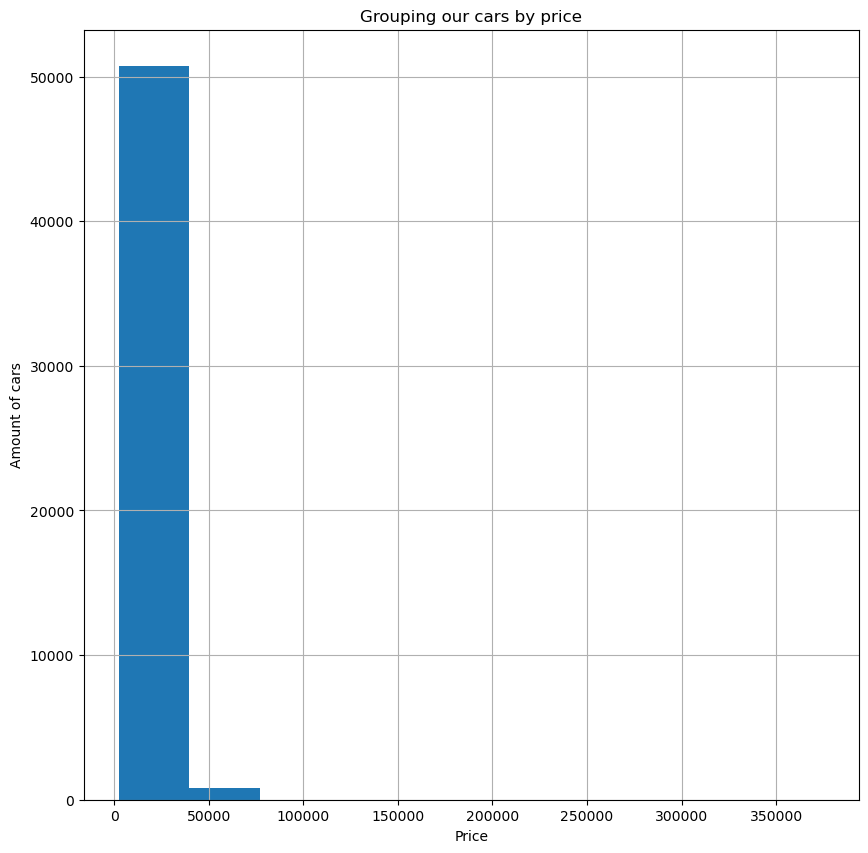

In [78]:
#Creating a histogram for our price column
project_info['price'].hist(bins=10,figsize=(10,10))
plt.xlabel('Price')
plt.ylabel('Amount of cars')
plt.title('Grouping our cars by price');

- What we see from our histo is that most of our cars belong price range between 2500 to 40000 but for now is hard to analyze our column because we have outliers with prices more than 50000 which provides a huge impact on our data analysis that why we need to work further to prepare our column for better understanding

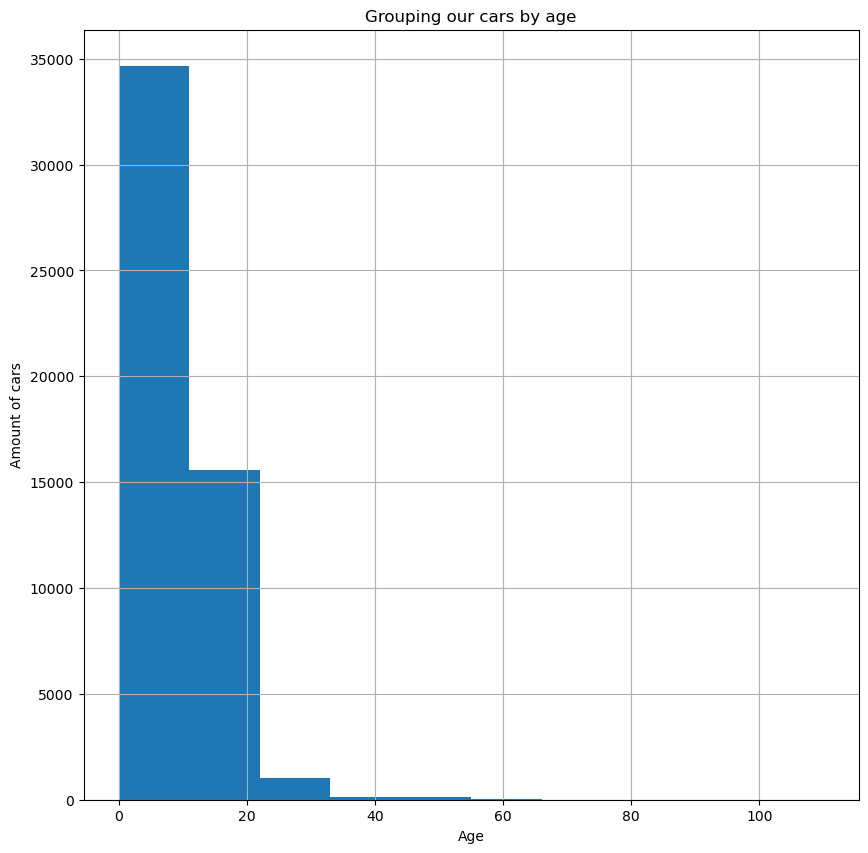

In [79]:
# Creating a histo for "vehicle's age" to find out what we have there
project_info['Vehicle"s_age'].hist(bins=10,figsize=(10,10))
plt.xlabel('Age')
plt.ylabel('Amount of cars')
plt.title('Grouping our cars by age');

- Seems most of the cars belong to the age range from 0 to 20, and we have here outliers that can bring us in the wrong direction when we will start deeper analyzing our data

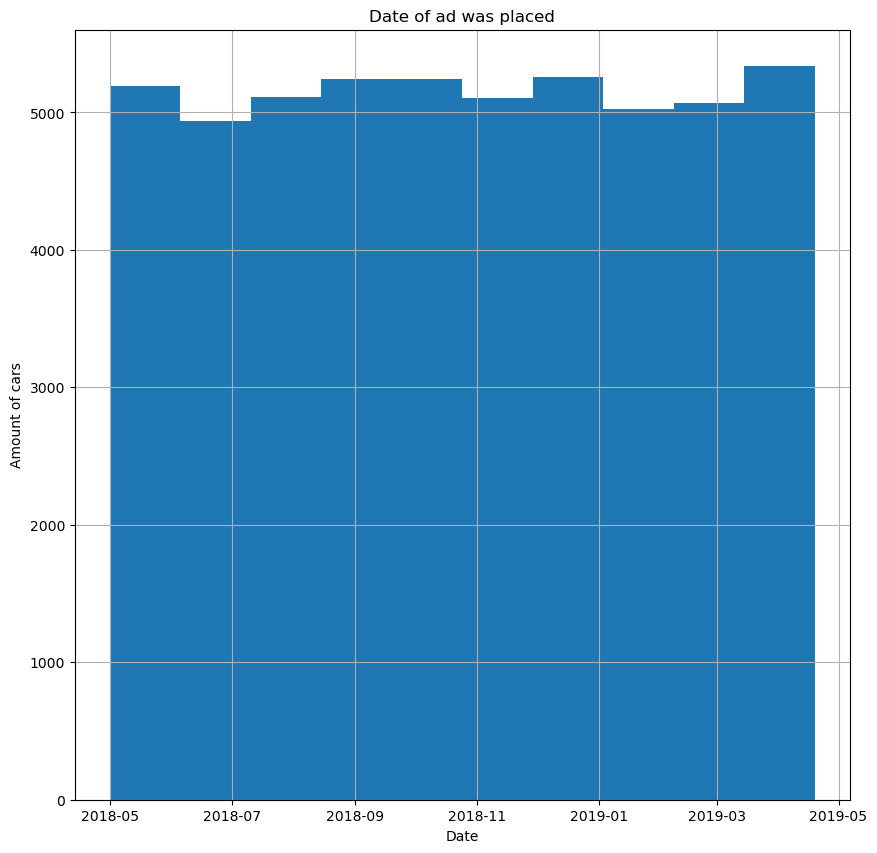

In [80]:
# Creating a histo when the  ad was placed to
project_info['date_posted'].hist(bins=10,figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('Amount of cars')
plt.title('Date of ad was placed');

- From here we can see that the date range of posted ads was between May 2018 and till the middle of April 2019

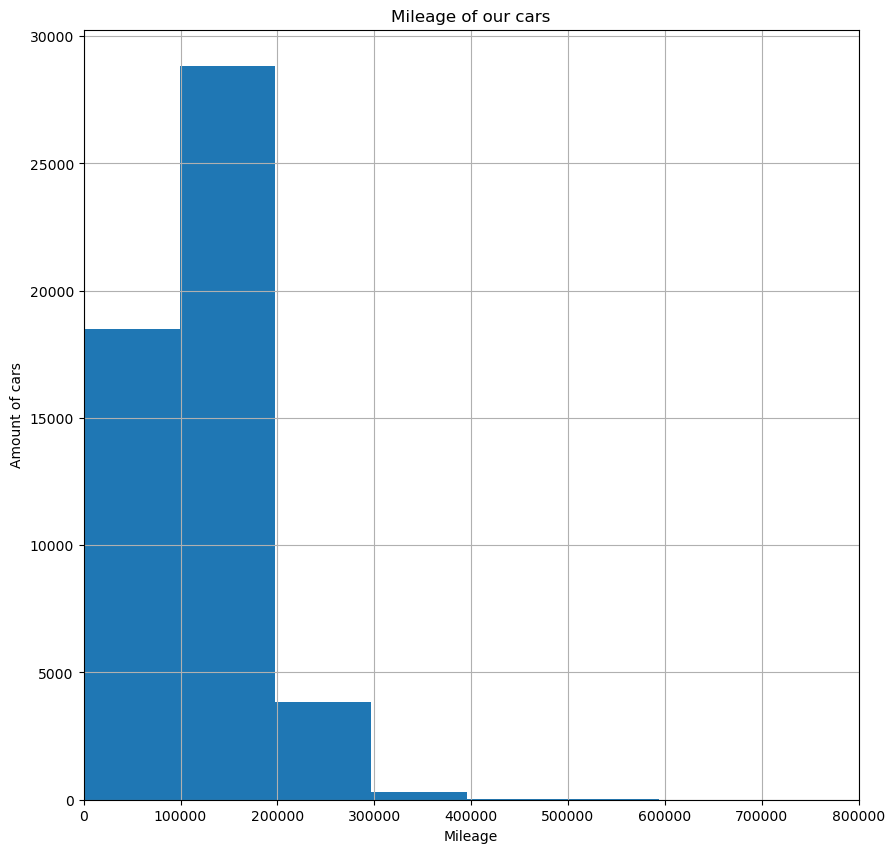

In [81]:
# Creating a histo with  mileage from our odometer column
project_info['odometer'].hist(bins=10,figsize=(10,10))
plt.xlim(0,800000)
plt.xlabel('Mileage')
plt.ylabel('Amount of cars')
plt.title('Mileage of our cars');

- We can't say with totally agree while we see this histo that we can clearly work with our data by this column because we have a good number of outliers that provide a mess in our table, but for sure we can say that most of our cars belong to mileage range between 0 to 200000 mile.

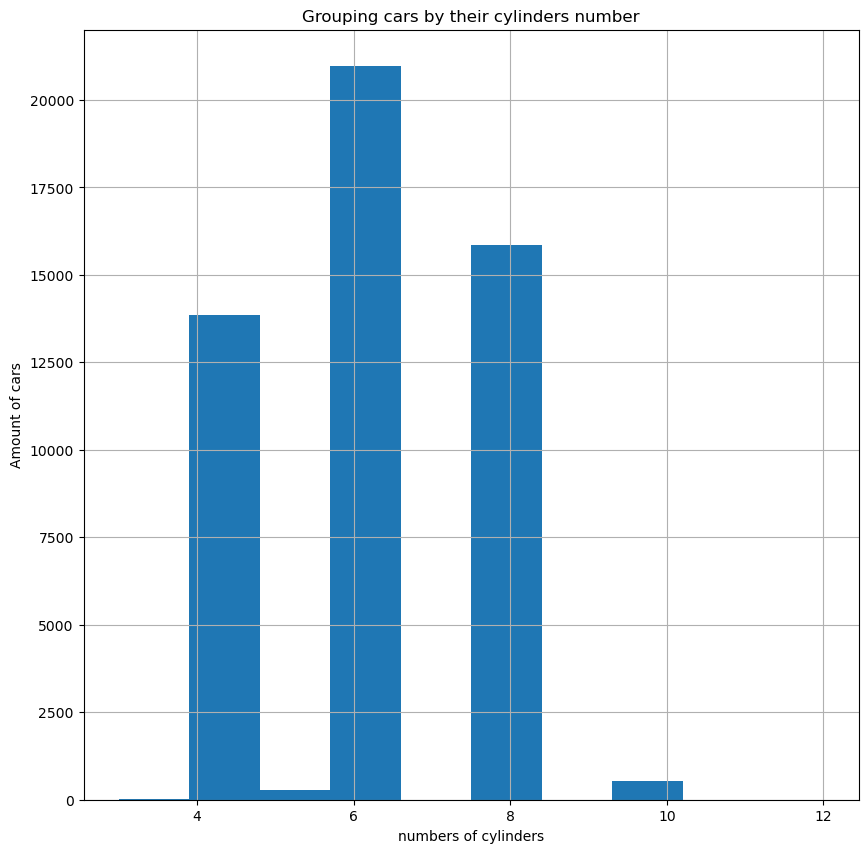

In [82]:
#Creating a histo for our cars by grouping them in numbers of cylinders
project_info['cylinders'].hist(bins=10,figsize=(10,10))
plt.xlabel('numbers of cylinders')
plt.ylabel('Amount of cars')
plt.title('Grouping cars by their cylinders number');

- Most numbers of our cars belong to 4,6 and 8 numbers of cylinders, for further analyzing we need to solve the problem with our outliers

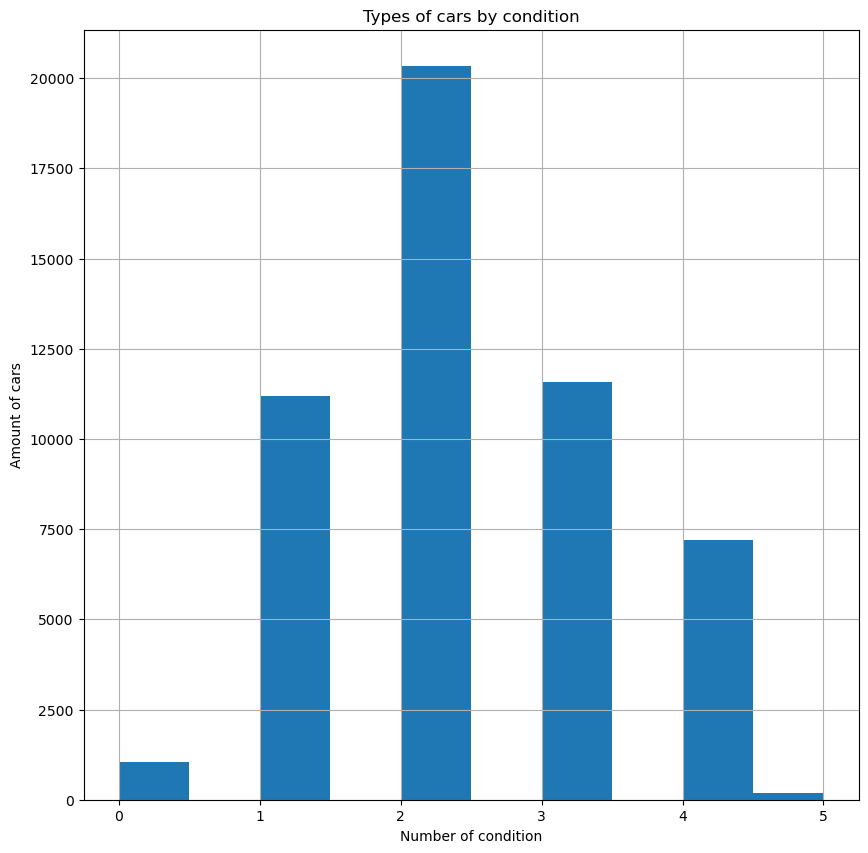

In [83]:
# Creating a histo for condition column
project_info['condition'].hist(bins=10,figsize=(10,10))
plt.xlabel('Number of condition')
plt.ylabel('Amount of cars')
plt.title('Types of cars by condition');

- In this column, we don't have any questions seems clear to me that most of the cars belong to number 1, 2,  and 3 conditions and we sorted before by our "odometer" all our cars that's why we can see clear picture here

> Now we can determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue work with the filtered data.

In [84]:
#Function for removing upper outliers
def remove_outliers(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < fence_high).values]
    return df_out

#function for storing upper outliers
def store_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_high).values]
    return df_out

In [85]:
#Storing outliers by "price" column
df_out_price =store_outlier(project_info,'price')

In [86]:
#Storingoutliers by "odometer" column
df_out_od =store_outlier(project_info,'odometer')

In [87]:
#Storing outliers by "cylinders" column
df_out_cyl =store_outlier(project_info,'cylinders')

In [88]:
#Storing outliers by "Vehicle"s_age" column
df_out_age =store_outlier(project_info,'Vehicle"s_age')

In [89]:
#Storing outliers by "date_posted" column
df_out_date =store_outlier(project_info,'date_posted')

In [90]:
#Removing outliers by "price" column
df_filter = remove_outliers(project_info,'price')

In [91]:
#Removing outliers by "cylinders" column
df_filter = remove_outliers(df_filter,'cylinders')

In [92]:
#Removing outliers by "odometer" column
df_filter = remove_outliers(df_filter,'odometer')

In [93]:
#Removing outliers by "Vehicle"s_age" column
df_filter = remove_outliers(df_filter,'Vehicle"s_age')

In [94]:
#Removing outliers by "date_posted" column
df_filter = remove_outliers(df_filter,'date_posted')
df_filter

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,month,year,"Vehicle""s_age",avg_mil_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,Other,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2013,ford f-150,3,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,5,17741.000000
2,5500,2013,hyundai sonata,2,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,5995,2003,ford f-150,1,8,gas,181613,automatic,pickup,Other,0,2019-03-22,9,4,3,2019,16,11350.812500
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,3,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.200000
51521,2700,2002,honda civic,1,4,gas,181500,automatic,sedan,white,0,2018-11-14,22,2,11,2018,16,11343.750000
51522,3950,2009,hyundai sonata,2,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27914.600000


> After we remove all our outliers let's recreate our histogram by all columns where we dropped outliers and check what change

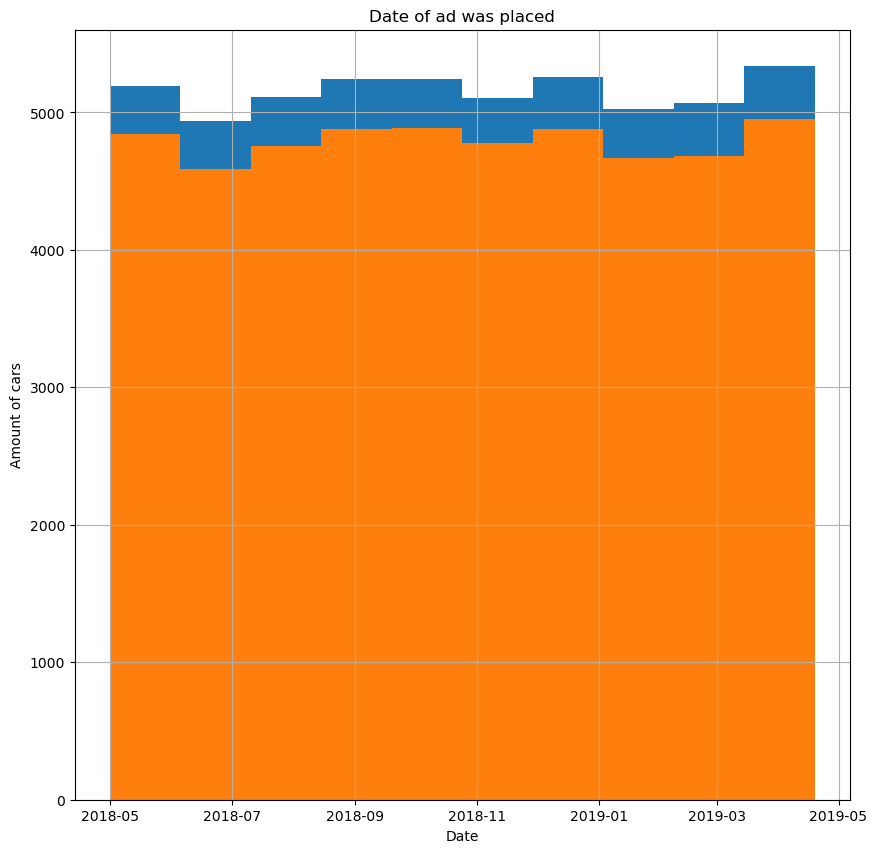

In [95]:
project_info['date_posted'].hist(bins=10,figsize=(10,10));
df_filter['date_posted'].hist(bins=10,figsize=(10,10));
plt.xlabel('Date')
plt.ylabel('Amount of cars')
plt.title('Date of ad was placed');

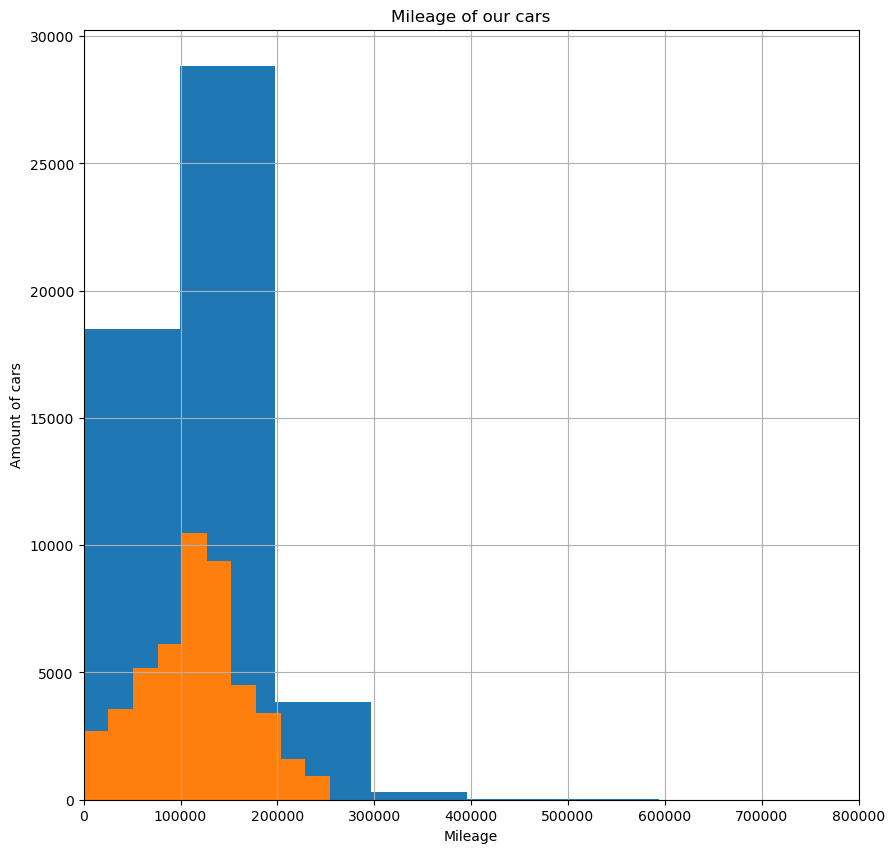

In [96]:
project_info['odometer'].hist(bins=10,figsize=(10,10));
df_filter['odometer'].hist(bins=10,figsize=(10,10));
plt.xlim(0,800000)
plt.xlabel('Mileage')
plt.ylabel('Amount of cars')
plt.title('Mileage of our cars');

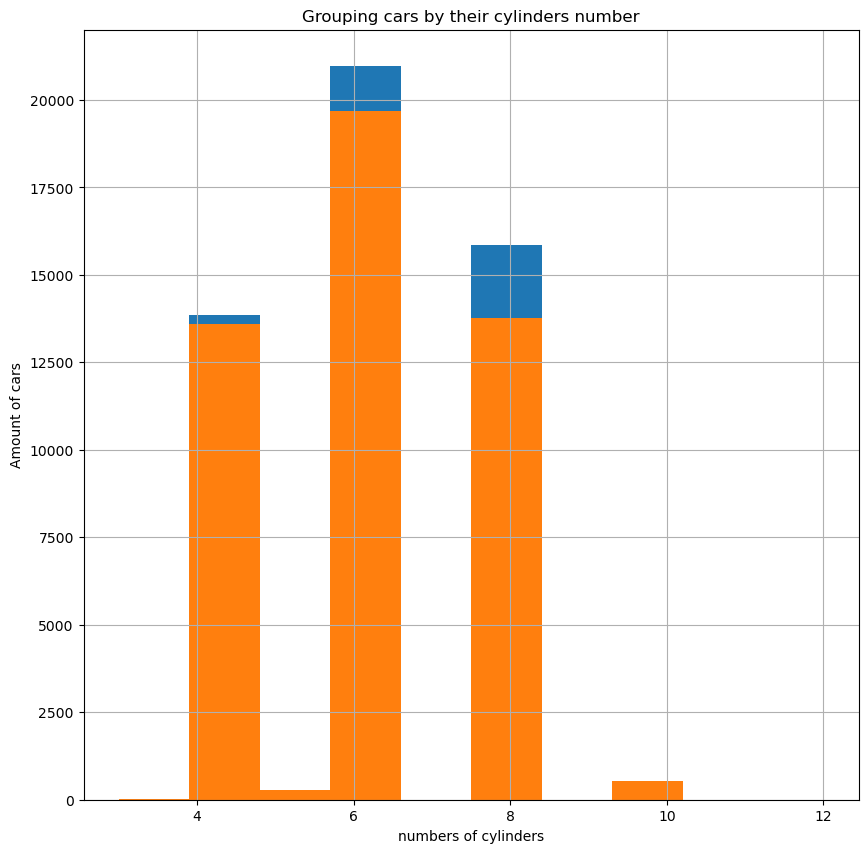

In [97]:
project_info['cylinders'].hist(bins=10,figsize=(10,10))
df_filter['cylinders'].hist(bins=10,figsize=(10,10))
plt.xlabel('numbers of cylinders')
plt.ylabel('Amount of cars')
plt.title('Grouping cars by their cylinders number');

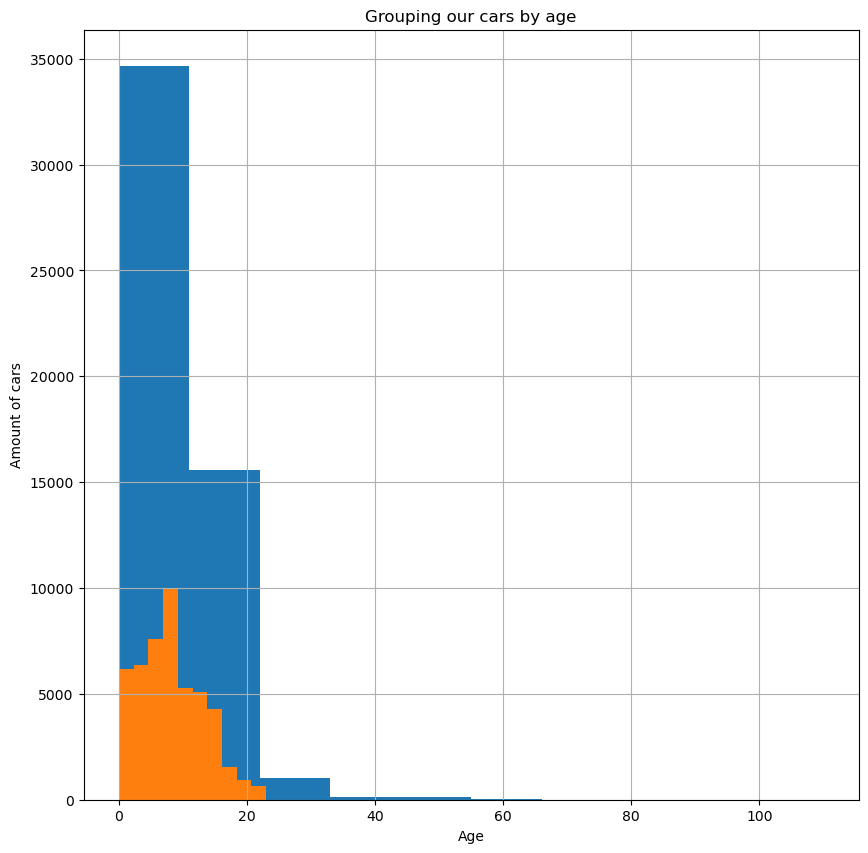

In [98]:
project_info['Vehicle"s_age'].hist(bins=10,figsize=(10,10))
df_filter['Vehicle"s_age'].hist(bins=10,figsize=(10,10))
plt.xlabel('Age')
plt.ylabel('Amount of cars')
plt.title('Grouping our cars by age');

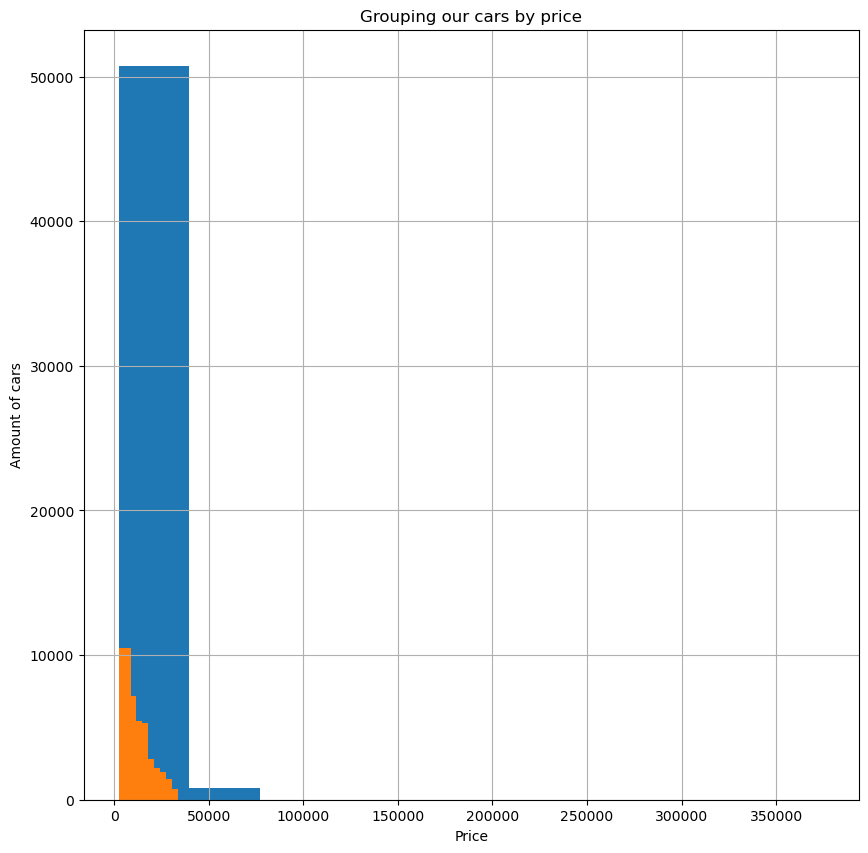

In [99]:
project_info['price'].hist(bins=10,figsize=(10,10))
df_filter['price'].hist(bins=10,figsize=(10,10))
plt.xlabel('Price')
plt.ylabel('Amount of cars')
plt.title('Grouping our cars by price');

# Conclusion:
- The outliers that we have in our data provided to us a huge impact on misunderstanding  and the wrong result  when we analyzing this problem, we can see this issue  in our histo when we compare the main data with filter result, which can bring us to the wrong solution and conclusion


> Now we can start working with another task where we need to study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

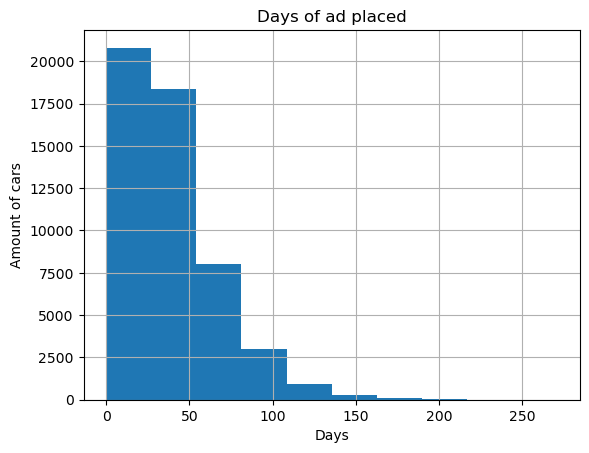

In [100]:
#Plot histo by days_listed
project_info['days_listed'].hist()
plt.xlabel('Days')
plt.ylabel('Amount of cars')
plt.title('Days of ad placed');

- We can see that ad for most of our cars was placed from 0 to 50 days 
- Let's create a function that will categorize our ad by a group of how long the ad was placed, we will create 3 different groups, quickly, normally and long.

> But first let's find out the mean and median time of our ad was placed

In [101]:
#The median time of ad was placed
median_ad = project_info['days_listed'].median()
median_ad

33.0

In [102]:
project_info['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

- By our median value we can say that the typical lifetime of our ad is nearly 33 days, it can provide us the opportunity to move to the next step and find out to what category belong each of our cars by their days_listed

> I propose that all values with less than 33 days will be categorized as quickly removing from 33 to 53 days will normal and more than 53 days will categorize as long
- We take 53 days from previous line code when we see that 25% of values stand above 53 days of ad  was placed

In [103]:
def ad_time(row):
    times= row['days_listed']
    days_above = 53
    if  times < median_ad:
        return 'quickly'
    elif times < days_above:
        return 'normal'
    return 'long'

In [104]:
#creating our new column 
project_info['time_ad'] = project_info.apply(ad_time,axis=1)

In [105]:
project_info['time_ad'].unique()

array(['quickly', 'normal', 'long'], dtype=object)

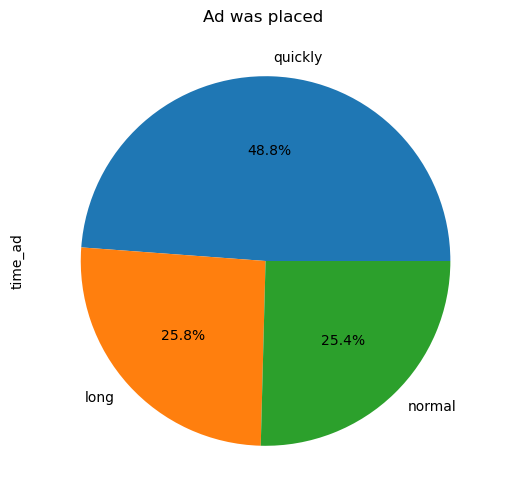

In [106]:
# let's create a pie plot to show to which types of "ad-time" belong most of our cars
project_info['time_ad'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(10,6), title= "Ad was placed ");

- From here we can see that most of our cars were sold in quick term

> Now let's move on and analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [107]:
project_info.pivot_table(index='type', values='days_listed',aggfunc='count')# How many each type of cars has ad

,days_listed
type,
SUV,12405
bus,24
convertible,446
coupe,2303
hatchback,1047
mini-van,1161
offroad,214
other,256
pickup,6988


- From our previous table, we can say that we have the 3 most popular types of cars: SUV, sedan, truck.

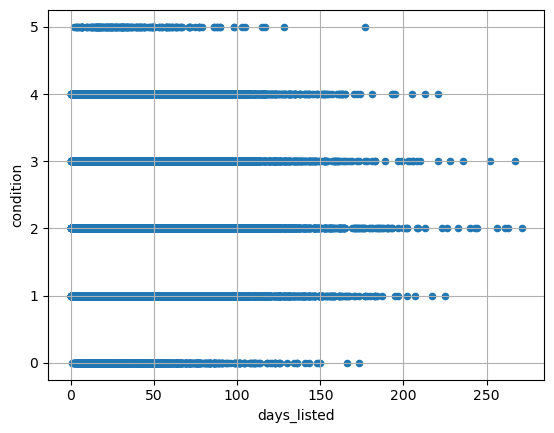

In [108]:
#Finding how long ad was placed depending on the type of condition
project_info.plot(x='days_listed', y='condition', kind='scatter',grid=True) ;

- The bulk of the points cluster together, representing the most common number of days how long the ad was placed. But when the days of ad increase the number of cars decrease. This means that people usually buy cars in shorter terms. And buy this scatter we can now say what type of cars ppl less prefer.
- We know from our previous pivot table and our scatter that the 2 most preferable types of cars which in "Like new" condition and "Excellent"


> What factors impact the price most? In this step we will take of the popular types we detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color.

- To have better results by making analyzing we will work with our filtered data, where we removed all outliers

In [109]:
#Creating a new DF for our next move
df_filter_upd=project_info.query('type=="SUV" or type=="truck"')

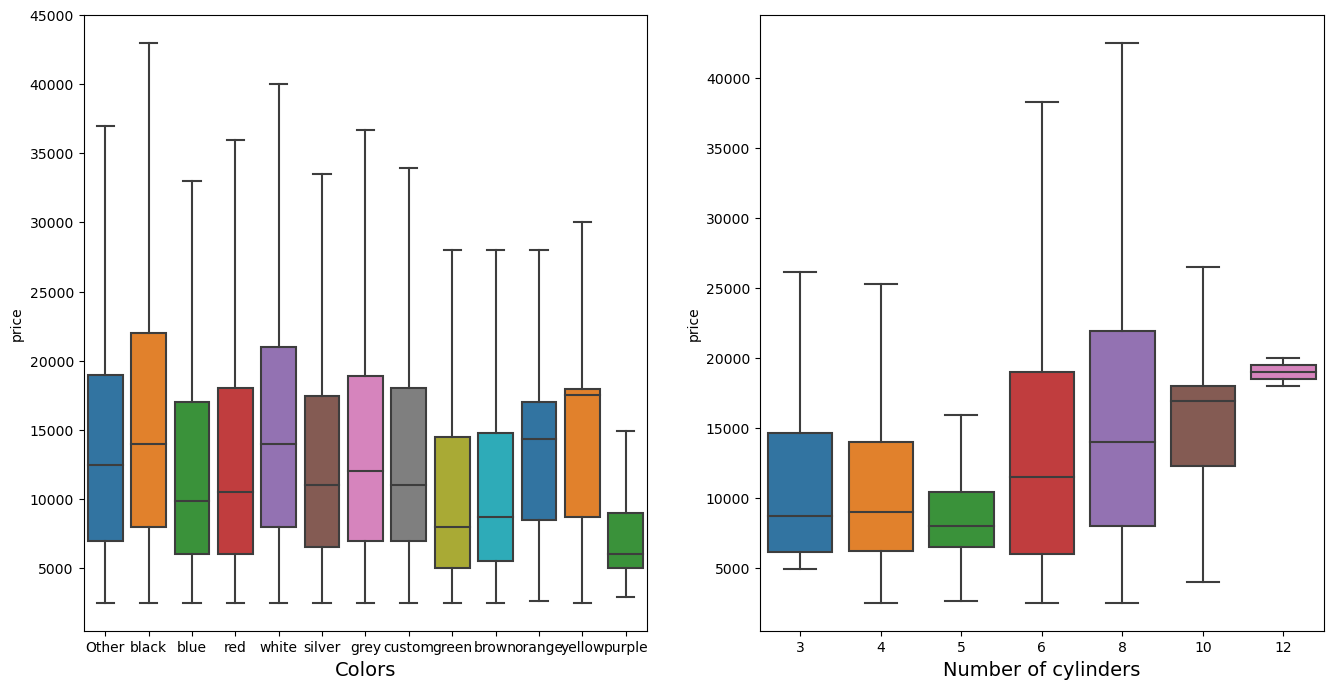

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(16,8) )
sns.boxplot(data=df_filter_upd, x="paint_color", y="price",  palette='tab10', showfliers=False, ax=axs[0])
axs[0].set_xlabel('Colors', fontsize=14)
sns.boxplot(x="cylinders", y="price", data=df_filter_upd, showfliers=False,ax=axs[1])
axs[1].set_xlabel('Number of cylinders', fontsize=14)
plt.show()

- From the previous two boxplots we can clearly say that more expensive ```SUV``` cars with yellow and orange colors, and ```truck``` cars have black and yellow colors, and we can clearly say that the more cylinders car has, the bigger price it has

> In the last step we will create a scatter plot for the rest of our column to find out from what parameters and how depends our price for cars

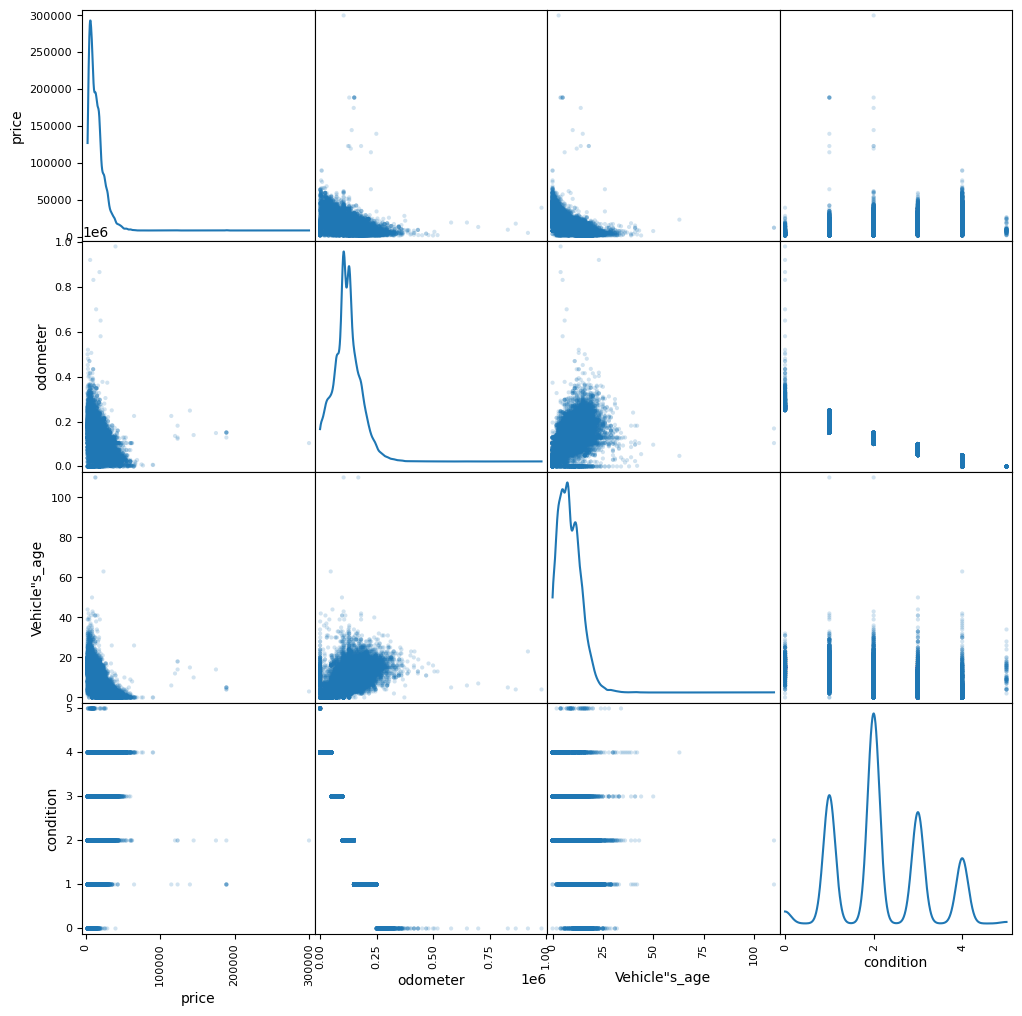

In [111]:
#Plotting scatter matrix for our column 
pd.plotting.scatter_matrix(df_filter_upd[['price','odometer','Vehicle"s_age','condition']], alpha=0.2, figsize=(12, 12), diagonal="kde");

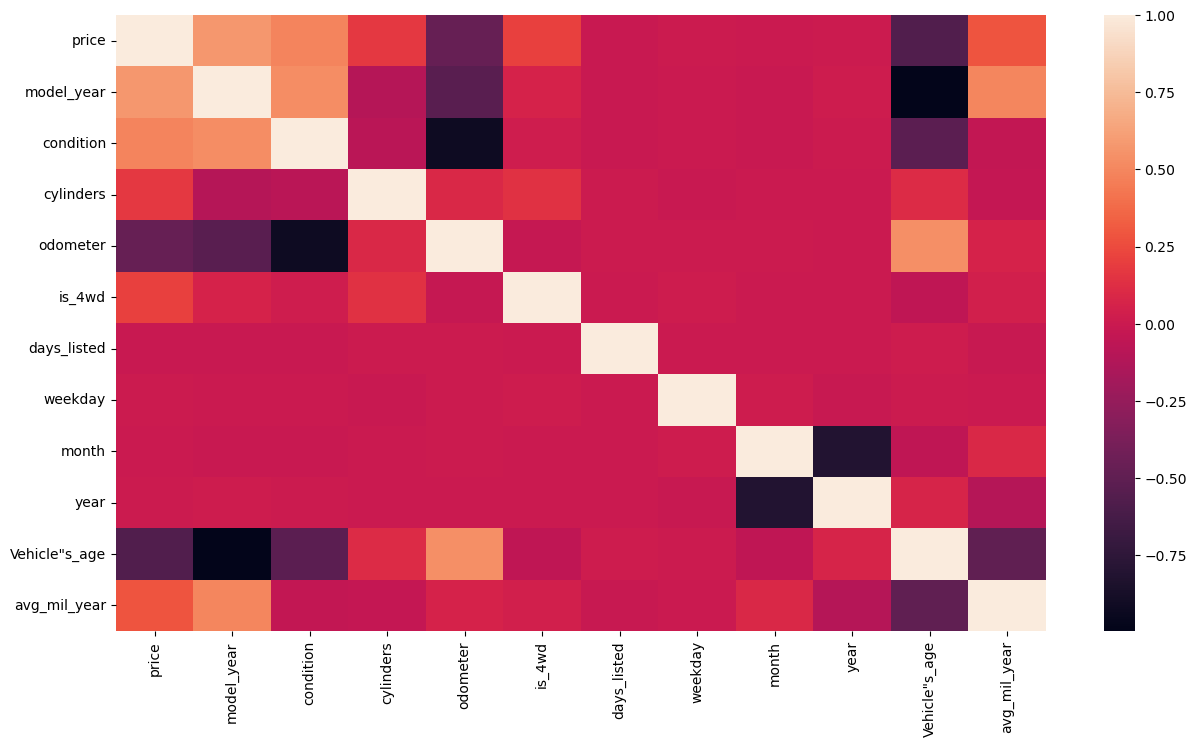

In [112]:
#Calculating our correlations and plotting heatmap to show how our parameters depend on each other
plt.figure(figsize=(15,8))
sns.heatmap(df_filter_upd.corr());


# Conclusion:
- From all the work that we have done, working with our missing values, clearing the mess in our data, finding main parameters, and working with our outliers we can finally conclude what parameters and how to take impact on prices of our cars, we see that we have different parameters that with putting together can give a  huge impact too, that means we can't clearly say that price depends only by one or two parameters from our data. Combining all together our parameters and making a deeper analysis of them we conclude that the 2 most negative factors which give our cars low prices are the age of the car and mileage. Then we see that  2 factors that provide a biggest impact to the price of a car, it's the year of the model and its condition. 